## Cleaned-up Pseudobulking Code
13 June 2024
by e_bruli

In [2]:
#If not loaded already:
!pip install scanpy
!pip install pandas
!pip install matplotlib
!pip install pydeseq2

In [1]:
!pip install openpyxl

In [1]:
import scanpy as sc
import pandas as pd
import random
import numpy as np
import matplotlib as plt
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [2]:
import gc 
import ctypes


In [3]:
gc.collect()
libc = ctypes.CDLL("libc.so.6") # clearing cache 
libc.malloc_trim(0)

1

In [21]:
def make_pseudobulk(adata, sample_colname, cell_type_colname, metacols):
    '''
    To create an an data with pseudo-bulk gene expression profiles for the samples and cell_types given.
    The function also carries metadata columns from the obs. metacols: as a list of col names.
    This is how to use:
        ps_adata = make_pseudobulk(hlca, sample_colname = 'sample', cell_type_colname = 'cell_type', metacols= ['patient', 'disease', 'tissue', 'study', 'sex'])
    '''
    ps_list = []
    for s in adata.obs[sample_colname].unique():
        adata_sub = adata[adata.obs[sample_colname] == s]
        
        for ct in adata_sub.obs[cell_type_colname].unique():
            adata_sub_ct = adata_sub[adata_sub.obs[cell_type_colname] == ct]
            
            adata_rep = sc.AnnData(X = adata_sub_ct.X.sum(axis = 0),
                                   var = adata_sub_ct.var[[]])
            samp_name=adata_sub.obs[sample_colname].iloc[0]
            cell= adata_sub_ct.obs[cell_type_colname].iloc[0]
            adata_rep.obs_names = [f"{samp_name}{cell}"]
            adata_rep.obs[cell_type_colname] = adata_sub_ct.obs[cell_type_colname].iloc[0]
            adata_rep.obs[metacols] = adata_sub_ct.obs[metacols].iloc[0]
            ps_list.append(adata_rep)

    ps_adata = sc.concat(ps_list)
    
    return ps_adata


In [ ]:
def savePBdata(adata, filename):
    #save the count matrix as df
    counts = adata.DataFrame(adata.X, columns = adata.var_names)
    counts = counts.astype(int, errors='ignore')
    #To get rid off all the 0s in count matrix (to prevent problems)
    counts=counts+1
    #save the obs as colData
    
    

In [76]:
#LuCa dataset
adata = sc.read_h5ad('/home/sharedFolder/int_fresh_start/descartes_ebru/LucaExtended_downloaded.06-21-2024.h5ad')

In [77]:
#adata.obs.columns.to_list()

### Subset adata to LUAD

In [78]:
#adata.obs['disease'].value_counts()

In [79]:
adata = adata[adata.obs['disease'].isin(['normal', 'lung adenocarcinoma'])]
#adata = adata[adata.obs['disease'].isin(['lung adenocarcinoma'])]

## Subset adata to only get '10x 3' v2'

In [80]:
#adata.obs['assay'].value_counts()

In [81]:
adata = adata[adata.obs['assay'] == '10x 3\' v2']

In [139]:
adata.obs['sample'].value_counts()

sample
He_Fan_2021_N1                       10929
He_Fan_2021_LUAD1                    10627
He_Fan_2021_LUAD4                    10170
Leader_Merad_2021_56                  9566
He_Fan_2021_LUAD2                     9069
                                     ...  
Laughney_Massague_2020_GSM3516674      231
Laughney_Massague_2020_GSM3516662      155
Adams_Kaminski_2020_244C               141
Leader_Merad_2021_335                   45
Leader_Merad_2021_336                    6
Name: count, Length: 231, dtype: int64

In [82]:
#adata.obs['disease'].value_counts()

In [83]:
#adata.obs['origin'].value_counts()

In [141]:
adata.obs['uicc_stage'].value_counts()

uicc_stage
I             288174
non-cancer    156489
II            129959
IV             71429
III            45344
Name: count, dtype: int64

In [85]:
#adata.obs['donor_id'].value_counts()

In [86]:
#adata[adata.obs['origin'].isin(['normal'])].obs['sample'].value_counts().count()

In [87]:
#adata.obs[['sample', 'cell_type', 'donor_id', 'disease', 'tissue', 'study', 'sex', 'age', 'uicc_stage', 'tumor_stage']]

In [88]:
#adata.obs['cell_type'].value_counts()

In [138]:
adata.obs['donor_id'].value_counts()

donor_id
Leader_Merad_2021_695           29094
He_Fan_2021_P1                  21556
He_Fan_2021_P4                  19225
He_Fan_2021_P2                  17949
Leader_Merad_2021_626           16065
                                ...  
Adams_Kaminski_2020_084C          364
Laughney_Massague_2020_LX701      302
Laughney_Massague_2020_LX653      155
Adams_Kaminski_2020_244C          141
Leader_Merad_2021_464              51
Name: count, Length: 137, dtype: int64

In [140]:
adata

AnnData object with n_obs × n_vars = 692831 × 17797
    obs: 'sample', 'uicc_stage', 'ever_smoker', 'age', 'donor_id', 'origin', 'dataset', 'ann_fine', 'cell_type_predicted', 'doublet_status', 'leiden', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'ann_coarse', 'cell_type_tumor', 'tumor_stage', 'EGFR_mutation', 'TP53_mutation', 'ALK_mutation', 'BRAF_mutation', 'ERBB2_mutation', 'KRAS_mutation', 'ROS_mutation', 'origin_fine', 'study', 'platform', 'cell_type_major', 'cell_type_neutro', 'cell_type_neutro_coarse', 'suspension_type', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'is_highly_va

# Create a pseudo-bulk of LuCa-extended for only LUAD.

In [91]:
ps_adata_luca = make_pseudobulk(adata, sample_colname = 'sample', cell_type_colname = 'cell_type', metacols= ['donor_id', 'disease', 'tissue', 'study', 'sex', 'age', 'uicc_stage', 'tumor_stage'])

In [92]:
#pd.crosstab(ps_adata_luca.obs['study'], ps_adata_luca.obs['disease'])

In [93]:
#ps_adata_luca.obs

In [94]:
#LuCa pb matrix
#pd.DataFrame(ps_adata_luca.X, columns = ps_adata_luca.var_names)

#### Pairwise DEG using PB matrix: malignant-cells vs others

In [95]:
with open('/home/sharedFolder/int_fresh_start/Homo_sapiens.GRCh38.104.gtf') as f:
    gtf = list(f)

#prep the gtf file
gtf = [x for x in gtf if not x.startswith('#')]
gtf = [x for x in gtf if 'gene_id "' in x and 'gene_name "' in x]
gtf = list(map(lambda x: (x.split('gene_id "')[1].split('"')[0], x.split('gene_name "')[1].split('"')[0]), gtf))

##### Load the surfaceome database

In [96]:
surf=pd.read_table('table_S3_surfaceome.txt', header=0)
surf

,UniProt name,UniProt accession,UniProt description,UniProt gene,Surfaceome Label,Surfaceome Label Source,Comment,length,TM domains,signalpeptide,...,CSPA id,UniProt subcellular,UniProt keywords,UniProt uniref,COMPARTMENTS link,COMPARTMENTS benchmark pos,COMPARTMENTS benchmark neg,HPA antibody,DrugBank approved drug IDs,GeneID
0,S12A8_HUMAN,A0AV02,Solute carrier family 12 member 8,SLC12A8,surface,machine learning,NaN,714,13,0,...,NaN,Membrane (Multi-pass membrane protein),Alternative splicing;Chloride;Complete proteom...,UniRef100_A0AV02;UniRef90_A0AV02;UniRef50_A0AV02,link,NaN,Cytoskeleton;Cytosol;Endoplasmic Reticulum;End...,HPA031123,NaN,84561
1,ESYT3_HUMAN,A0FGR9,Extended synaptotagmin-3,ESYT3,surface,pos. trainingset,NaN,886,2,0,...,NaN,Cell membrane (Peripheral membrane protein);En...,Alternative splicing;Calcium;Cell membrane;Com...,UniRef100_A0FGR9;UniRef90_A0FGR9;UniRef50_A0FGR9,link,Plasma membrane,Cytoskeleton;Cytosol;Endoplasmic Reticulum;End...,HPA039200,NaN,83850
2,SC5AA_HUMAN,A0PJK1,Sodium/glucose cotransporter 5,SLC5A10,surface,machine learning,NaN,596,14,0,...,NaN,Cell membrane (Multi-pass membrane protein),Alternative splicing;Cell membrane;Complete pr...,UniRef100_A0PJK1;UniRef90_A0PJK1;UniRef50_A0PJK1,link,NaN,NaN,HPA052014,NaN,125206
3,CLRN2_HUMAN,A0PK11,Clarin-2,CLRN2,surface,machine learning,NaN,232,4,0,...,NaN,Membrane (Multi-pass membrane protein),Complete proteome;Glycoprotein;Membrane;Polymo...,UniRef100_A0PK11;UniRef90_A0PK11;UniRef50_A0PK11,link,NaN,NaN,HPA042407,NaN,645104
4,CC50C_HUMAN,A0ZSE6,Cell cycle control protein 50C,TMEM30C,surface,machine learning,NaN,113,1,0,...,NaN,Membrane (Single-pass membrane protein),Complete proteome;Glycoprotein;Membrane;Refere...,UniRef100_A0ZSE6;UniRef90_A0ZT23-2;UniRef50_A0...,link,NaN,Cytoskeleton;Cytosol;Endoplasmic Reticulum;End...,no,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2881,CAD10_HUMAN,Q9Y6N8,Cadherin-10,CDH10,surface,pos. trainingset,NaN,788,1,1,...,Q9Y6N8,Cell membrane (Single-pass type I membrane pro...,Calcium;Cell adhesion;Cell membrane;Cleavage o...,UniRef100_Q9Y6N8;UniRef90_Q9Y6N8;UniRef50_P55285,link,Plasma membrane,Cytoskeleton;Cytosol;Endoplasmic Reticulum;End...,HPA010651,NaN,1008
2882,TNR11_HUMAN,Q9Y6Q6,Tumor necrosis factor receptor superfamily mem...,TNFRSF11A,surface,pos. trainingset,NaN,616,1,1,...,Q9Y6Q6,Cell membrane (Single-pass type I membrane pro...,3D-structure;Alternative splicing;Cell membran...,UniRef100_Q9Y6Q6;UniRef90_Q9Y6Q6;UniRef50_Q9Y6Q6,link,NaN,NaN,CAB010391;HPA027728,NaN,8792
2883,S4A4_HUMAN,Q9Y6R1,Electrogenic sodium bicarbonate cotransporter 1,SLC4A4,surface,machine learning,NaN,1079,10,0,...,NaN,Basolateral cell membrane (Multi- pass membran...,Alternative splicing;Cell membrane;Complete pr...,UniRef100_Q9Y6R1;UniRef90_Q9Y6R1;UniRef50_Q9Y6R1,link,NaN,NaN,CAB022493;HPA035628;HPA035629,NaN,8671
2884,ICOS_HUMAN,Q9Y6W8,Inducible T-cell costimulator,ICOS,surface,machine learning,NaN,199,1,1,...,NaN,Cell membrane (Single-pass type I membrane pro...,Alternative splicing;Cell membrane;Complete pr...,UniRef100_Q9Y6W8;UniRef90_Q9Y6W8;UniRef50_Q9Y6W8,link,Plasma membrane,Cytoskeleton;Cytosol;Endoplasmic Reticulum;End...,CAB032575,NaN,29851


##### Test each gene for DEG: malignant cells vs other cell types in Lung Cancer Atlas

In [99]:
ctyps = ps_adata_luca.obs['cell_type'].unique()

In [98]:
#surf['UniProt gene']

In [100]:
sub_canc = ps_adata_luca[ps_adata_luca.obs['cell_type'] == 'malignant cell' ]
df = pd.DataFrame()

for c in ctyps:
    if c != 'malignant cell':
        pbs = [sub_canc]
        print(c)
        sub_ct = ps_adata_luca[ps_adata_luca.obs['cell_type'] == c ]
        pbs.append(sub_ct)
        pb = sc.concat(pbs)
        print(pb)
        counts= pd.DataFrame(pb.X, columns = pb.var_names)
        counts = counts.astype(int, errors='ignore')
        #To get rid off all the 0s in count matrix (to prevent problems)
        counts=counts+1
        dds = DeseqDataSet(counts = counts, metadata=pb.obs, design_factors = "cell_type")
        sc.pp.filter_genes(dds, min_cells = 1)
        dds.deseq2()
        stat_res = DeseqStats(dds, contrast=('cell-type', 'malignant cell', c))
        stat_res.summary()
        de  = stat_res.results_df
        de = de.sort_values('log2FoldChange', ascending = False)
        #print(de)
        #get rownames aka gene symbols
        row_names = de.index.tolist()
        #row_names
        #add rownames as a new column 
        de['gene_symbols'] = row_names
        gtf=dict(gtf)
        de['gene_name'] = de['gene_symbols'].map(gtf)
        de = de[(de['padj'] < 0.05) & (de['log2FoldChange'] > 1.0) ]
        de['inContrastTo'] = c
        #check if DEG genes are in surfaceome db:
        result = de['gene_name'].isin(surf['UniProt gene'])
        filtered_data = de[result]
        print(filtered_data)
        df = pd.concat([df, filtered_data])
        #save deg list
        df.to_csv('LUAD_degs_w-only-10xv2_DEGs.LUAD.csv', index=True)

non-classical monocyte
AnnData object with n_obs × n_vars = 374 × 17797
    obs: 'cell_type', 'donor_id', 'disease', 'tissue', 'study', 'sex', 'age', 'uicc_stage', 'tumor_stage'


/tmp/ipykernel_1937855/2516390067.py:16: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(counts = counts, metadata=pb.obs, design_factors = "cell_type")
Fitting size factors...
... done in 0.25 seconds.

Fitting dispersions...
... done in 5.08 seconds.

Fitting dispersion trend curve...
/mnt/ssd0/0524_descart_lung_atlas/descartes/lib/python3.11/site-packages/pydeseq2/dds.py:590: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend()
... done in 0.40 seconds.

Fitting MAP dispersions...
... done in 5.48 seconds.

Fitting LFCs...
... done in 7.85 seconds.

Replacing 417 outlier genes.

Fitting dispersions...
... done in 0.53 seconds.

Fitting MAP dispersions...
... done in 0.56 seconds.

Fitting LFCs...
... done in 0.62 seconds.

Running Wald tests...
... done in 5.77 seconds.



Log2 fold change & Wald test p-value: cell-type malignant cell vs non-classical monocyte
                 baseMean  log2FoldChange     lfcSE      stat        pvalue  \
ENSG00000121410  2.346537        0.645502  0.155389  4.154110  3.265566e-05   
ENSG00000268895  1.139052       -0.562073  0.157518 -3.568299  3.593057e-04   
ENSG00000175899  1.405221        0.045999  0.147028  0.312859  7.543877e-01   
ENSG00000245105  1.116308       -0.737518  0.163086 -4.522276  6.117812e-06   
ENSG00000166535  1.134516       -0.593994  0.161307 -3.682390  2.310580e-04   
...                   ...             ...       ...       ...           ...   
ENSG00000070476  1.494396        0.000060  0.120816  0.000500  9.996011e-01   
ENSG00000203995  1.142037       -0.602342  0.156711 -3.843636  1.212249e-04   
ENSG00000162378  1.847789        0.678406  0.123718  5.483470  4.170637e-08   
ENSG00000159840  4.489436       -0.958261  0.139632 -6.862777  6.753480e-12   
ENSG00000074755  1.789645       -0.430942 

/tmp/ipykernel_1937855/2516390067.py:16: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(counts = counts, metadata=pb.obs, design_factors = "cell_type")
Fitting size factors...
... done in 0.31 seconds.

Fitting dispersions...
... done in 5.36 seconds.

Fitting dispersion trend curve...
/mnt/ssd0/0524_descart_lung_atlas/descartes/lib/python3.11/site-packages/pydeseq2/dds.py:590: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend()
... done in 0.31 seconds.

Fitting MAP dispersions...
... done in 5.09 seconds.

Fitting LFCs...
... done in 6.31 seconds.

Replacing 401 outlier genes.

Fitting dispersions...
... done in 0.48 seconds.

Fitting MAP dispersions...
... done in 0.48 seconds.

Fitting LFCs...
... done in 0.56 seconds.

Running Wald tests...
... done in 5.18 seconds.



Log2 fold change & Wald test p-value: cell-type malignant cell vs alveolar macrophage
                  baseMean  log2FoldChange     lfcSE       stat        pvalue  \
ENSG00000121410   5.196707       -0.566673  0.133188  -4.254686  2.093423e-05   
ENSG00000268895   1.592498       -0.239437  0.143972  -1.663082  9.629599e-02   
ENSG00000175899   5.231870       -1.963451  0.139777 -14.047045  8.031630e-45   
ENSG00000245105   1.333877        0.544322  0.162785   3.343810  8.263637e-04   
ENSG00000166535   1.380815        0.396475  0.156580   2.532093  1.133838e-02   
...                    ...             ...       ...        ...           ...   
ENSG00000070476   3.163437       -1.048088  0.126696  -8.272453  1.312307e-16   
ENSG00000203995   1.396156        0.417375  0.150956   2.764874  5.694479e-03   
ENSG00000162378   5.504862       -1.250109  0.111552 -11.206498  3.788877e-29   
ENSG00000159840  14.224488       -2.297206  0.130813 -17.561030  4.897847e-69   
ENSG00000074755   4.403

/tmp/ipykernel_1937855/2516390067.py:16: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(counts = counts, metadata=pb.obs, design_factors = "cell_type")
Fitting size factors...
... done in 0.24 seconds.

Fitting dispersions...
... done in 5.34 seconds.

Fitting dispersion trend curve...
/mnt/ssd0/0524_descart_lung_atlas/descartes/lib/python3.11/site-packages/pydeseq2/dds.py:590: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend()
... done in 0.29 seconds.

Fitting MAP dispersions...
... done in 5.20 seconds.

Fitting LFCs...
... done in 6.24 seconds.

Replacing 401 outlier genes.

Fitting dispersions...
... done in 0.52 seconds.

Fitting MAP dispersions...
... done in 0.52 seconds.

Fitting LFCs...
... done in 0.57 seconds.

Running Wald tests...
... done in 5.26 seconds.



Log2 fold change & Wald test p-value: cell-type malignant cell vs endothelial cell of lymphatic vessel
                 baseMean  log2FoldChange     lfcSE       stat        pvalue  \
ENSG00000121410  2.306722        0.914734  0.171121   5.345521  9.015714e-08   
ENSG00000268895  1.164668       -0.521187  0.166608  -3.128216  1.758707e-03   
ENSG00000175899  3.938975       -2.326769  0.155411 -14.971718  1.123803e-50   
ENSG00000245105  1.137418       -0.674599  0.172777  -3.904458  9.443696e-05   
ENSG00000166535  1.159017       -0.541736  0.171255  -3.163324  1.559785e-03   
...                   ...             ...       ...        ...           ...   
ENSG00000070476  1.524460        0.035171  0.128135   0.274487  7.837107e-01   
ENSG00000203995  1.173364       -0.568971  0.165433  -3.439281  5.832622e-04   
ENSG00000162378  2.107329        0.268030  0.122928   2.180387  2.922879e-02   
ENSG00000159840  2.827011        0.337777  0.137811   2.451024  1.424506e-02   
ENSG00000074755  

/tmp/ipykernel_1937855/2516390067.py:16: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(counts = counts, metadata=pb.obs, design_factors = "cell_type")
Fitting size factors...
... done in 0.32 seconds.

Fitting dispersions...
... done in 5.40 seconds.

Fitting dispersion trend curve...
/mnt/ssd0/0524_descart_lung_atlas/descartes/lib/python3.11/site-packages/pydeseq2/dds.py:590: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend()
... done in 0.28 seconds.

Fitting MAP dispersions...
... done in 5.38 seconds.

Fitting LFCs...
... done in 5.96 seconds.

Replacing 394 outlier genes.

Fitting dispersions...
... done in 0.49 seconds.

Fitting MAP dispersions...
... done in 0.51 seconds.

Fitting LFCs...
... done in 0.53 seconds.

Running Wald tests...
... done in 5.20 seconds.



Log2 fold change & Wald test p-value: cell-type malignant cell vs macrophage
                  baseMean  log2FoldChange     lfcSE       stat  \
ENSG00000121410   7.466338       -1.208073  0.123035  -9.818957   
ENSG00000268895   1.624254       -0.411218  0.132299  -3.108254   
ENSG00000175899  21.447115       -4.152254  0.143592 -28.917130   
ENSG00000245105   1.241041        0.364147  0.149716   2.432242   
ENSG00000166535   1.265214        0.441341  0.146958   3.003178   
...                    ...             ...       ...        ...   
ENSG00000070476   2.754248       -0.628801  0.116000  -5.420716   
ENSG00000203995   1.268098        0.519673  0.143241   3.627963   
ENSG00000162378   4.617333       -0.729616  0.090302  -8.079715   
ENSG00000159840  17.564877       -2.501627  0.101484 -24.650573   
ENSG00000074755   4.580866       -1.539519  0.112134 -13.729215   

                        pvalue           padj  
ENSG00000121410   9.330427e-23   4.018722e-22  
ENSG00000268895   1.88

/tmp/ipykernel_1937855/2516390067.py:16: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(counts = counts, metadata=pb.obs, design_factors = "cell_type")
Fitting size factors...
... done in 0.32 seconds.

Fitting dispersions...
... done in 5.23 seconds.

Fitting dispersion trend curve...
/mnt/ssd0/0524_descart_lung_atlas/descartes/lib/python3.11/site-packages/pydeseq2/dds.py:590: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend()
... done in 0.28 seconds.

Fitting MAP dispersions...
... done in 5.16 seconds.

Fitting LFCs...
... done in 5.90 seconds.

Replacing 421 outlier genes.

Fitting dispersions...
... done in 0.56 seconds.

Fitting MAP dispersions...
... done in 0.57 seconds.

Fitting LFCs...
... done in 0.59 seconds.

Running Wald tests...
... done in 5.55 seconds.



Log2 fold change & Wald test p-value: cell-type malignant cell vs classical monocyte
                  baseMean  log2FoldChange     lfcSE       stat  \
ENSG00000121410   7.628632       -1.413780  0.129705 -10.899997   
ENSG00000268895   1.366296       -0.034918  0.142061  -0.245794   
ENSG00000175899   3.717755       -1.449763  0.130608 -11.100079   
ENSG00000245105   1.238934        0.042433  0.151104   0.280822   
ENSG00000166535   1.277034       -0.075465  0.140132  -0.538531   
...                    ...             ...       ...        ...   
ENSG00000070476   2.825347       -0.941355  0.127333  -7.392846   
ENSG00000203995   1.275300       -0.005625  0.137547  -0.040893   
ENSG00000162378   3.820302       -0.555766  0.098842  -5.622770   
ENSG00000159840  15.917080       -2.520067  0.113653 -22.173409   
ENSG00000074755   4.927275       -1.870244  0.129671 -14.423022   

                        pvalue           padj  
ENSG00000121410   1.152612e-27   6.632086e-27  
ENSG0000026889

/tmp/ipykernel_1937855/2516390067.py:16: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(counts = counts, metadata=pb.obs, design_factors = "cell_type")
Fitting size factors...
... done in 0.34 seconds.

Fitting dispersions...
... done in 5.19 seconds.

Fitting dispersion trend curve...
/mnt/ssd0/0524_descart_lung_atlas/descartes/lib/python3.11/site-packages/pydeseq2/dds.py:590: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend()
... done in 0.29 seconds.

Fitting MAP dispersions...
... done in 4.90 seconds.

Fitting LFCs...
... done in 6.05 seconds.

Replacing 422 outlier genes.

Fitting dispersions...
... done in 0.51 seconds.

Fitting MAP dispersions...
... done in 0.55 seconds.

Fitting LFCs...
... done in 0.58 seconds.

Running Wald tests...
... done in 5.20 seconds.



Log2 fold change & Wald test p-value: cell-type malignant cell vs CD8-positive, alpha-beta T cell
                  baseMean  log2FoldChange     lfcSE       stat        pvalue  \
ENSG00000121410   9.418323       -1.570922  0.125620 -12.505300  6.983560e-36   
ENSG00000268895   1.963270       -0.845816  0.127498  -6.633963  3.267915e-11   
ENSG00000175899   4.185765       -1.405933  0.155755  -9.026588  1.771082e-19   
ENSG00000245105   5.005905       -2.642896  0.157950 -16.732436  7.606275e-63   
ENSG00000166535   1.261689        0.755226  0.150540   5.016770  5.254754e-07   
...                    ...             ...       ...        ...           ...   
ENSG00000070476   2.613932       -0.250586  0.097680  -2.565377  1.030637e-02   
ENSG00000203995   1.300192        0.713900  0.145785   4.896947  9.733694e-07   
ENSG00000162378   3.017032        0.532410  0.093928   5.668296  1.442248e-08   
ENSG00000159840  13.181254       -1.977992  0.111081 -17.806758  6.263380e-71   
ENSG0000007

/tmp/ipykernel_1937855/2516390067.py:16: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(counts = counts, metadata=pb.obs, design_factors = "cell_type")
Fitting size factors...
... done in 0.32 seconds.

Fitting dispersions...
... done in 5.11 seconds.

Fitting dispersion trend curve...
/mnt/ssd0/0524_descart_lung_atlas/descartes/lib/python3.11/site-packages/pydeseq2/dds.py:590: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend()
... done in 0.29 seconds.

Fitting MAP dispersions...
... done in 5.41 seconds.

Fitting LFCs...
... done in 5.77 seconds.

Replacing 431 outlier genes.

Fitting dispersions...
... done in 0.59 seconds.

Fitting MAP dispersions...
... done in 0.59 seconds.

Fitting LFCs...
... done in 0.66 seconds.

Running Wald tests...
... done in 5.26 seconds.



Log2 fold change & Wald test p-value: cell-type malignant cell vs myeloid cell
                 baseMean  log2FoldChange     lfcSE       stat        pvalue  \
ENSG00000121410  2.396256        0.519912  0.146614   3.546125  3.909410e-04   
ENSG00000268895  1.133657       -0.539908  0.150783  -3.580693  3.426840e-04   
ENSG00000175899  2.648311       -1.472368  0.141991 -10.369453  3.414752e-25   
ENSG00000245105  1.105295       -0.694265  0.157066  -4.420200  9.860970e-06   
ENSG00000166535  1.118632       -0.532525  0.155464  -3.425379  6.139415e-04   
...                   ...             ...       ...        ...           ...   
ENSG00000070476  1.440856        0.115365  0.115956   0.994900  3.197849e-01   
ENSG00000203995  1.128161       -0.548586  0.150944  -3.634368  2.786630e-04   
ENSG00000162378  1.915028        0.508203  0.113404   4.481364  7.416742e-06   
ENSG00000159840  4.287132       -0.808895  0.126559  -6.391417  1.643551e-10   
ENSG00000074755  1.605339       -0.109764

/tmp/ipykernel_1937855/2516390067.py:16: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(counts = counts, metadata=pb.obs, design_factors = "cell_type")
Fitting size factors...
... done in 0.33 seconds.

Fitting dispersions...
... done in 5.18 seconds.

Fitting dispersion trend curve...
/mnt/ssd0/0524_descart_lung_atlas/descartes/lib/python3.11/site-packages/pydeseq2/dds.py:590: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend()
... done in 0.28 seconds.

Fitting MAP dispersions...
... done in 5.31 seconds.

Fitting LFCs...
... done in 5.94 seconds.

Replacing 396 outlier genes.

Fitting dispersions...
... done in 0.48 seconds.

Fitting MAP dispersions...
... done in 0.48 seconds.

Fitting LFCs...
... done in 0.53 seconds.

Running Wald tests...
... done in 5.36 seconds.



Log2 fold change & Wald test p-value: cell-type malignant cell vs natural killer cell
                 baseMean  log2FoldChange     lfcSE       stat        pvalue  \
ENSG00000121410  3.935760       -0.064223  0.130710  -0.491338  6.231875e-01   
ENSG00000268895  1.342025       -0.201572  0.136038  -1.481728  1.384127e-01   
ENSG00000175899  3.288398       -1.270420  0.151303  -8.396501  4.599781e-17   
ENSG00000245105  2.262844       -1.636334  0.147639 -11.083320  1.511608e-28   
ENSG00000166535  1.195839        0.285940  0.151839   1.883181  5.967578e-02   
...                   ...             ...       ...        ...           ...   
ENSG00000070476  2.090891       -0.188274  0.099642  -1.889511  5.882333e-02   
ENSG00000203995  1.197581        0.347689  0.147756   2.353124  1.861640e-02   
ENSG00000162378  2.376727        0.690713  0.101537   6.802580  1.027622e-11   
ENSG00000159840  7.209361       -1.232156  0.117960 -10.445500  1.536435e-25   
ENSG00000074755  3.405394       -1

/tmp/ipykernel_1937855/2516390067.py:16: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(counts = counts, metadata=pb.obs, design_factors = "cell_type")
Fitting size factors...
... done in 0.33 seconds.

Fitting dispersions...
... done in 5.51 seconds.

Fitting dispersion trend curve...
/mnt/ssd0/0524_descart_lung_atlas/descartes/lib/python3.11/site-packages/pydeseq2/dds.py:590: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend()
... done in 0.29 seconds.

Fitting MAP dispersions...
... done in 4.95 seconds.

Fitting LFCs...
... done in 6.07 seconds.

Replacing 405 outlier genes.

Fitting dispersions...
... done in 0.50 seconds.

Fitting MAP dispersions...
... done in 0.54 seconds.

Fitting LFCs...
... done in 0.52 seconds.

Running Wald tests...
... done in 5.42 seconds.



Log2 fold change & Wald test p-value: cell-type malignant cell vs CD1c-positive myeloid dendritic cell
                 baseMean  log2FoldChange     lfcSE       stat        pvalue  \
ENSG00000121410  5.095398       -1.028568  0.130757  -7.866250  3.654296e-15   
ENSG00000268895  1.278252       -0.623165  0.137595  -4.528992  5.926580e-06   
ENSG00000175899  4.623461       -2.223705  0.132404 -16.794822  2.663015e-63   
ENSG00000245105  1.127187       -0.477315  0.149989  -3.182337  1.460919e-03   
ENSG00000166535  1.121803       -0.241987  0.149683  -1.616664  1.059508e-01   
...                   ...             ...       ...        ...           ...   
ENSG00000070476  1.672349        0.011864  0.104205   0.113858  9.093506e-01   
ENSG00000203995  1.130468       -0.246648  0.145563  -1.694434  9.018276e-02   
ENSG00000162378  2.278491        0.325660  0.100838   3.229550  1.239852e-03   
ENSG00000159840  9.536957       -2.023223  0.115117 -17.575328  3.806850e-69   
ENSG00000074755  

/tmp/ipykernel_1937855/2516390067.py:16: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(counts = counts, metadata=pb.obs, design_factors = "cell_type")
Fitting size factors...
... done in 0.37 seconds.

Fitting dispersions...
... done in 5.03 seconds.

Fitting dispersion trend curve...
/mnt/ssd0/0524_descart_lung_atlas/descartes/lib/python3.11/site-packages/pydeseq2/dds.py:590: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend()
... done in 0.28 seconds.

Fitting MAP dispersions...
... done in 5.14 seconds.

Fitting LFCs...
... done in 6.04 seconds.

Replacing 412 outlier genes.

Fitting dispersions...
... done in 0.50 seconds.

Fitting MAP dispersions...
... done in 0.48 seconds.

Fitting LFCs...
... done in 0.56 seconds.

Running Wald tests...
... done in 5.34 seconds.



Log2 fold change & Wald test p-value: cell-type malignant cell vs B cell
                 baseMean  log2FoldChange     lfcSE      stat        pvalue  \
ENSG00000121410  5.052292       -0.938049  0.140837 -6.660513  2.728729e-11   
ENSG00000268895  1.467948       -0.886985  0.132631 -6.687625  2.268220e-11   
ENSG00000175899  1.873371       -0.305806  0.136137 -2.246313  2.468399e-02   
ENSG00000245105  1.153792       -0.164686  0.153536 -1.072619  2.834420e-01   
ENSG00000166535  1.164820        0.022445  0.153686  0.146046  8.838853e-01   
...                   ...             ...       ...       ...           ...   
ENSG00000070476  1.749660        0.021999  0.100713  0.218436  8.270896e-01   
ENSG00000203995  1.282749       -0.256635  0.145062 -1.769149  7.686906e-02   
ENSG00000162378  2.364465        0.286596  0.101495  2.823755  4.746466e-03   
ENSG00000159840  3.644057       -0.032040  0.119821 -0.267400  7.891611e-01   
ENSG00000074755  2.313114       -0.665507  0.101415 -6.562

/tmp/ipykernel_1937855/2516390067.py:16: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(counts = counts, metadata=pb.obs, design_factors = "cell_type")
Fitting size factors...
... done in 0.23 seconds.

Fitting dispersions...
... done in 5.29 seconds.

Fitting dispersion trend curve...
/mnt/ssd0/0524_descart_lung_atlas/descartes/lib/python3.11/site-packages/pydeseq2/dds.py:590: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend()
... done in 0.29 seconds.

Fitting MAP dispersions...
... done in 5.24 seconds.

Fitting LFCs...
... done in 5.83 seconds.

Replacing 432 outlier genes.

Fitting dispersions...
... done in 0.56 seconds.

Fitting MAP dispersions...
... done in 0.56 seconds.

Fitting LFCs...
... done in 0.61 seconds.

Running Wald tests...
... done in 5.56 seconds.



Log2 fold change & Wald test p-value: cell-type malignant cell vs capillary endothelial cell
                  baseMean  log2FoldChange     lfcSE       stat  \
ENSG00000121410   2.394049        0.809979  0.165167   4.903992   
ENSG00000268895   1.197124       -0.533724  0.161889  -3.296848   
ENSG00000175899  10.283368       -3.839649  0.173390 -22.144610   
ENSG00000245105   1.152248       -0.601962  0.170753  -3.525346   
ENSG00000166535   1.173670       -0.471855  0.169425  -2.785034   
...                    ...             ...       ...        ...   
ENSG00000070476   1.576566       -0.076915  0.121055  -0.635372   
ENSG00000203995   1.168442       -0.420957  0.165499  -2.543566   
ENSG00000162378   2.131929        0.243523  0.122298   1.991233   
ENSG00000159840   2.924263        0.262659  0.136216   1.928251   
ENSG00000074755   1.754313       -0.297119  0.119714  -2.481896   

                        pvalue           padj  
ENSG00000121410   9.390833e-07   3.805297e-06  
ENSG00

/tmp/ipykernel_1937855/2516390067.py:16: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(counts = counts, metadata=pb.obs, design_factors = "cell_type")
Fitting size factors...
... done in 0.31 seconds.

Fitting dispersions...
... done in 5.45 seconds.

Fitting dispersion trend curve...
/mnt/ssd0/0524_descart_lung_atlas/descartes/lib/python3.11/site-packages/pydeseq2/dds.py:590: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend()
... done in 0.29 seconds.

Fitting MAP dispersions...
... done in 5.28 seconds.

Fitting LFCs...
... done in 6.15 seconds.

Replacing 420 outlier genes.

Fitting dispersions...
... done in 0.52 seconds.

Fitting MAP dispersions...
... done in 0.52 seconds.

Fitting LFCs...
... done in 0.60 seconds.

Running Wald tests...
... done in 5.31 seconds.



Log2 fold change & Wald test p-value: cell-type malignant cell vs regulatory T cell
                 baseMean  log2FoldChange     lfcSE      stat        pvalue  \
ENSG00000121410  4.381640       -0.730776  0.138126 -5.290656  1.218786e-07   
ENSG00000268895  1.426268       -0.904062  0.136371 -6.629449  3.369418e-11   
ENSG00000175899  1.715808       -0.244239  0.132603 -1.841879  6.549284e-02   
ENSG00000245105  1.196982       -0.588423  0.151171 -3.892439  9.924156e-05   
ENSG00000166535  1.152746       -0.250278  0.153008 -1.635724  1.018974e-01   
...                   ...             ...       ...       ...           ...   
ENSG00000070476  1.546612        0.287091  0.110486  2.598444  9.364745e-03   
ENSG00000203995  1.162405       -0.252462  0.148635 -1.698537  8.940639e-02   
ENSG00000162378  2.303216        0.313520  0.105468  2.972664  2.952278e-03   
ENSG00000159840  5.027485       -0.855746  0.118867 -7.199178  6.057675e-13   
ENSG00000074755  2.269697       -0.681606  0.10

/tmp/ipykernel_1937855/2516390067.py:16: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(counts = counts, metadata=pb.obs, design_factors = "cell_type")
Fitting size factors...
... done in 0.29 seconds.

Fitting dispersions...
... done in 4.14 seconds.

Fitting dispersion trend curve...
/mnt/ssd0/0524_descart_lung_atlas/descartes/lib/python3.11/site-packages/pydeseq2/dds.py:590: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend()
... done in 0.29 seconds.

Fitting MAP dispersions...
... done in 5.10 seconds.

Fitting LFCs...
... done in 6.17 seconds.

Replacing 596 outlier genes.

Fitting dispersions...
... done in 0.68 seconds.

Fitting MAP dispersions...
... done in 0.95 seconds.

Fitting LFCs...
... done in 1.01 seconds.

Running Wald tests...
... done in 5.31 seconds.



Log2 fold change & Wald test p-value: cell-type malignant cell vs epithelial cell of lung
                 baseMean  log2FoldChange     lfcSE      stat        pvalue  \
ENSG00000121410  2.653424        0.379360  0.152780  2.483046  1.302642e-02   
ENSG00000268895  1.171523       -0.301851  0.152211 -1.983106  4.735554e-02   
ENSG00000175899  1.661669       -0.289663  0.140113 -2.067348  3.870136e-02   
ENSG00000245105  1.137692       -0.368331  0.162023 -2.273326  2.300656e-02   
ENSG00000166535  1.153293       -0.235725  0.161469 -1.459880  1.443229e-01   
...                   ...             ...       ...       ...           ...   
ENSG00000070476  1.752746       -0.333013  0.106259 -3.133970  1.724586e-03   
ENSG00000203995  1.188013       -0.303341  0.153588 -1.975028  4.826492e-02   
ENSG00000162378  2.373465       -0.062737  0.112324 -0.558535  5.764794e-01   
ENSG00000159840  2.512629        0.825358  0.124535  6.627507  3.414040e-11   
ENSG00000074755  1.808620       -0.290481

/tmp/ipykernel_1937855/2516390067.py:16: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(counts = counts, metadata=pb.obs, design_factors = "cell_type")
Fitting size factors...
... done in 0.27 seconds.

Fitting dispersions...
... done in 5.59 seconds.

Fitting dispersion trend curve...
/mnt/ssd0/0524_descart_lung_atlas/descartes/lib/python3.11/site-packages/pydeseq2/dds.py:590: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend()
... done in 0.29 seconds.

Fitting MAP dispersions...
... done in 5.12 seconds.

Fitting LFCs...
... done in 5.99 seconds.

Replacing 427 outlier genes.

Fitting dispersions...
... done in 0.53 seconds.

Fitting MAP dispersions...
... done in 0.54 seconds.

Fitting LFCs...
... done in 0.60 seconds.

Running Wald tests...
... done in 5.43 seconds.



Log2 fold change & Wald test p-value: cell-type malignant cell vs type I pneumocyte
                 baseMean  log2FoldChange     lfcSE      stat        pvalue  \
ENSG00000121410  2.398729        0.851177  0.171108  4.974497  6.541734e-07   
ENSG00000268895  1.178132       -0.516148  0.167457 -3.082263  2.054336e-03   
ENSG00000175899  1.504757       -0.027028  0.155883 -0.173388  8.623464e-01   
ENSG00000245105  1.145199       -0.632486  0.174885 -3.616575  2.985273e-04   
ENSG00000166535  1.149480       -0.436757  0.175406 -2.489983  1.277491e-02   
...                   ...             ...       ...       ...           ...   
ENSG00000070476  1.619392       -0.182782  0.121853 -1.500025  1.336080e-01   
ENSG00000203995  1.167372       -0.462604  0.169295 -2.732531  6.284978e-03   
ENSG00000162378  2.392012       -0.174079  0.125167 -1.390770  1.642953e-01   
ENSG00000159840  2.608738        0.753197  0.143681  5.242156  1.587109e-07   
ENSG00000074755  1.688633       -0.226852  0.12

/tmp/ipykernel_1937855/2516390067.py:16: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(counts = counts, metadata=pb.obs, design_factors = "cell_type")
Fitting size factors...
... done in 0.29 seconds.

Fitting dispersions...
... done in 5.38 seconds.

Fitting dispersion trend curve...
/mnt/ssd0/0524_descart_lung_atlas/descartes/lib/python3.11/site-packages/pydeseq2/dds.py:590: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend()
... done in 0.29 seconds.

Fitting MAP dispersions...
... done in 4.91 seconds.

Fitting LFCs...
... done in 6.26 seconds.

Replacing 408 outlier genes.

Fitting dispersions...
... done in 0.65 seconds.

Fitting MAP dispersions...
... done in 0.49 seconds.

Fitting LFCs...
... done in 0.53 seconds.

Running Wald tests...
... done in 5.27 seconds.



Log2 fold change & Wald test p-value: cell-type malignant cell vs vein endothelial cell
                  baseMean  log2FoldChange     lfcSE       stat  \
ENSG00000121410   2.373406        0.798529  0.149255   5.350082   
ENSG00000268895   1.179939       -0.418007  0.151046  -2.767405   
ENSG00000175899  17.312907       -4.441282  0.160666 -27.642890   
ENSG00000245105   1.157736       -0.556172  0.158918  -3.499735   
ENSG00000166535   1.159621       -0.352406  0.159856  -2.204516   
...                    ...             ...       ...        ...   
ENSG00000070476   1.558091        0.021756  0.109966   0.197841   
ENSG00000203995   1.161786       -0.313966  0.155663  -2.016957   
ENSG00000162378   2.203445        0.196314  0.110213   1.781218   
ENSG00000159840   3.786667       -0.402866  0.125358  -3.213713   
ENSG00000074755   1.781789       -0.289733  0.112030  -2.586214   

                        pvalue           padj  
ENSG00000121410   8.791453e-08   4.229445e-07  
ENSG0000026

/tmp/ipykernel_1937855/2516390067.py:16: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(counts = counts, metadata=pb.obs, design_factors = "cell_type")
Fitting size factors...
... done in 0.32 seconds.

Fitting dispersions...
... done in 5.25 seconds.

Fitting dispersion trend curve...
/mnt/ssd0/0524_descart_lung_atlas/descartes/lib/python3.11/site-packages/pydeseq2/dds.py:590: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend()
... done in 0.29 seconds.

Fitting MAP dispersions...
... done in 5.30 seconds.

Fitting LFCs...
... done in 5.97 seconds.

Replacing 423 outlier genes.

Fitting dispersions...
... done in 0.57 seconds.

Fitting MAP dispersions...
... done in 0.54 seconds.

Fitting LFCs...
... done in 0.58 seconds.

Running Wald tests...
... done in 5.21 seconds.



Log2 fold change & Wald test p-value: cell-type malignant cell vs CD4-positive, alpha-beta T cell
                  baseMean  log2FoldChange     lfcSE       stat        pvalue  \
ENSG00000121410  10.762846       -1.748260  0.126549 -13.814869  2.073299e-43   
ENSG00000268895   2.055063       -0.897124  0.120338  -7.455042  8.983927e-14   
ENSG00000175899   3.300033       -0.841557  0.144323  -5.831063  5.507547e-09   
ENSG00000245105   2.342886       -1.330907  0.137415  -9.685346  3.480279e-22   
ENSG00000166535   1.293169        0.932067  0.151816   6.139447  8.280912e-10   
...                    ...             ...       ...        ...           ...   
ENSG00000070476   2.620529       -0.191056  0.094515  -2.021443  4.323389e-02   
ENSG00000203995   1.334541        0.866837  0.146428   5.919871  3.221945e-09   
ENSG00000162378   3.848814       -0.100982  0.089069  -1.133750  2.568994e-01   
ENSG00000159840  12.435370       -1.817425  0.113472 -16.016467  9.806617e-58   
ENSG0000007

/tmp/ipykernel_1937855/2516390067.py:16: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(counts = counts, metadata=pb.obs, design_factors = "cell_type")
Fitting size factors...
... done in 0.24 seconds.

Fitting dispersions...
... done in 5.09 seconds.

Fitting dispersion trend curve...
/mnt/ssd0/0524_descart_lung_atlas/descartes/lib/python3.11/site-packages/pydeseq2/dds.py:590: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend()
... done in 0.29 seconds.

Fitting MAP dispersions...
... done in 4.88 seconds.

Fitting LFCs...
... done in 6.10 seconds.

Replacing 457 outlier genes.

Fitting dispersions...
... done in 0.61 seconds.

Fitting MAP dispersions...
... done in 0.61 seconds.

Fitting LFCs...
... done in 0.64 seconds.

Running Wald tests...
... done in 5.18 seconds.



Log2 fold change & Wald test p-value: cell-type malignant cell vs pulmonary artery endothelial cell
                 baseMean  log2FoldChange     lfcSE       stat        pvalue  \
ENSG00000121410  2.244760        1.093348  0.183800   5.948590  2.704628e-09   
ENSG00000268895  1.161240       -0.598100  0.173404  -3.449182  5.622884e-04   
ENSG00000175899  6.867412       -3.365816  0.162668 -20.691283  4.150214e-95   
ENSG00000245105  1.129355       -0.739678  0.179675  -4.116757  3.842413e-05   
ENSG00000166535  1.143936       -0.587159  0.178958  -3.280991  1.034430e-03   
...                   ...             ...       ...        ...           ...   
ENSG00000070476  1.475932        0.107352  0.138387   0.775736  4.379046e-01   
ENSG00000203995  1.155714       -0.600455  0.173393  -3.462964  5.342593e-04   
ENSG00000162378  1.910778        0.698665  0.140374   4.977157  6.452487e-07   
ENSG00000159840  2.744276        0.439605  0.145327   3.024948  2.486757e-03   
ENSG00000074755  1.5

/tmp/ipykernel_1937855/2516390067.py:16: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(counts = counts, metadata=pb.obs, design_factors = "cell_type")
Fitting size factors...
... done in 0.29 seconds.

Fitting dispersions...
... done in 3.37 seconds.

Fitting dispersion trend curve...
/mnt/ssd0/0524_descart_lung_atlas/descartes/lib/python3.11/site-packages/pydeseq2/dds.py:590: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend()
... done in 0.31 seconds.

Fitting MAP dispersions...
... done in 5.00 seconds.

Fitting LFCs...
... done in 5.98 seconds.

Replacing 371 outlier genes.

Fitting dispersions...
... done in 0.41 seconds.

Fitting MAP dispersions...
... done in 0.41 seconds.

Fitting LFCs...
... done in 0.45 seconds.

Running Wald tests...
... done in 5.45 seconds.



Log2 fold change & Wald test p-value: cell-type malignant cell vs fibroblast of lung
                  baseMean  log2FoldChange     lfcSE       stat  \
ENSG00000121410   2.422456        0.642343  0.150079   4.280035   
ENSG00000268895   1.168645       -0.410011  0.152635  -2.686227   
ENSG00000175899  19.864937       -4.675890  0.171733 -27.227670   
ENSG00000245105   1.158619       -0.604418  0.158218  -3.820162   
ENSG00000166535   1.153981       -0.367492  0.159489  -2.304186   
...                    ...             ...       ...        ...   
ENSG00000070476   1.489908        0.228327  0.115509   1.976707   
ENSG00000203995   1.159899       -0.351673  0.154957  -2.269482   
ENSG00000162378   2.128879        0.230144  0.109895   2.094211   
ENSG00000159840   5.512133       -1.289378  0.139032  -9.273965   
ENSG00000074755   1.649435       -0.043704  0.113243  -0.385934   

                        pvalue           padj  
ENSG00000121410   1.868639e-05   5.914312e-05  
ENSG0000026889

/tmp/ipykernel_1937855/2516390067.py:16: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(counts = counts, metadata=pb.obs, design_factors = "cell_type")
Fitting size factors...
... done in 0.33 seconds.

Fitting dispersions...
... done in 5.18 seconds.

Fitting dispersion trend curve...
/mnt/ssd0/0524_descart_lung_atlas/descartes/lib/python3.11/site-packages/pydeseq2/dds.py:590: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend()
... done in 0.28 seconds.

Fitting MAP dispersions...
... done in 4.86 seconds.

Fitting LFCs...
... done in 6.13 seconds.

Replacing 436 outlier genes.

Fitting dispersions...
... done in 0.55 seconds.

Fitting MAP dispersions...
... done in 0.58 seconds.

Fitting LFCs...
... done in 0.61 seconds.

Running Wald tests...
... done in 5.65 seconds.



Log2 fold change & Wald test p-value: cell-type malignant cell vs plasma cell
                 baseMean  log2FoldChange     lfcSE      stat        pvalue  \
ENSG00000121410  4.692181       -1.162862  0.153451 -7.578080  3.507051e-14   
ENSG00000268895  1.185811       -0.653374  0.145405 -4.493474  7.007046e-06   
ENSG00000175899  1.815446       -0.677295  0.136668 -4.955778  7.204126e-07   
ENSG00000245105  1.136213       -0.690758  0.155068 -4.454551  8.406897e-06   
ENSG00000166535  1.128910       -0.465735  0.155354 -2.997902  2.718451e-03   
...                   ...             ...       ...       ...           ...   
ENSG00000070476  1.383047        0.262758  0.114964  2.285562  2.227990e-02   
ENSG00000203995  1.161785       -0.623564  0.146192 -4.265379  1.995631e-05   
ENSG00000162378  1.789172        0.726037  0.114620  6.334301  2.384198e-10   
ENSG00000159840  2.337568        0.889404  0.124007  7.172190  7.380740e-13   
ENSG00000074755  1.648950       -0.314963  0.115748 -

/tmp/ipykernel_1937855/2516390067.py:16: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(counts = counts, metadata=pb.obs, design_factors = "cell_type")
Fitting size factors...
... done in 0.22 seconds.

Fitting dispersions...
... done in 3.92 seconds.

Fitting dispersion trend curve...
/mnt/ssd0/0524_descart_lung_atlas/descartes/lib/python3.11/site-packages/pydeseq2/dds.py:590: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend()
... done in 0.45 seconds.

Fitting MAP dispersions...
... done in 4.17 seconds.

Fitting LFCs...
... done in 4.37 seconds.

Replacing 402 outlier genes.

Fitting dispersions...
... done in 0.43 seconds.

Fitting MAP dispersions...
... done in 0.36 seconds.

Fitting LFCs...
... done in 0.37 seconds.

Running Wald tests...
... done in 3.72 seconds.



Log2 fold change & Wald test p-value: cell-type malignant cell vs smooth muscle cell
                 baseMean  log2FoldChange     lfcSE       stat        pvalue  \
ENSG00000121410  2.456377        0.455369  0.167569   2.717502  6.577670e-03   
ENSG00000268895  1.172016       -0.705611  0.165029  -4.275674  1.905596e-05   
ENSG00000175899  6.131606       -3.124418  0.164198 -19.028354  9.932332e-81   
ENSG00000245105  1.124275       -0.794030  0.172775  -4.595756  4.311834e-06   
ENSG00000166535  1.137988       -0.639961  0.171790  -3.725259  1.951145e-04   
...                   ...             ...       ...        ...           ...   
ENSG00000070476  1.393564        0.221855  0.137090   1.618324  1.055929e-01   
ENSG00000203995  1.148928       -0.655100  0.166539  -3.933610  8.367963e-05   
ENSG00000162378  1.844337        0.695135  0.134611   5.164040  2.416764e-07   
ENSG00000159840  3.261012       -0.254158  0.146343  -1.736728  8.243512e-02   
ENSG00000074755  1.461177        0.

/tmp/ipykernel_1937855/2516390067.py:16: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(counts = counts, metadata=pb.obs, design_factors = "cell_type")
Fitting size factors...
... done in 0.34 seconds.

Fitting dispersions...
... done in 5.36 seconds.

Fitting dispersion trend curve...
/mnt/ssd0/0524_descart_lung_atlas/descartes/lib/python3.11/site-packages/pydeseq2/dds.py:590: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend()
... done in 0.28 seconds.

Fitting MAP dispersions...
... done in 4.95 seconds.

Fitting LFCs...
... done in 6.11 seconds.

Replacing 424 outlier genes.

Fitting dispersions...
... done in 0.58 seconds.

Fitting MAP dispersions...
... done in 0.54 seconds.

Fitting LFCs...
... done in 0.59 seconds.

Running Wald tests...
... done in 4.99 seconds.



Log2 fold change & Wald test p-value: cell-type malignant cell vs multi-ciliated epithelial cell
                 baseMean  log2FoldChange     lfcSE       stat        pvalue  \
ENSG00000121410  2.943009        0.127688  0.154603   0.825908  4.088560e-01   
ENSG00000268895  1.294265       -0.725816  0.152810  -4.749782  2.036357e-06   
ENSG00000175899  1.515053        0.124327  0.146930   0.846163  3.974616e-01   
ENSG00000245105  1.156350       -0.431190  0.168810  -2.554294  1.064034e-02   
ENSG00000166535  1.170466       -0.266975  0.168983  -1.579898  1.141302e-01   
...                   ...             ...       ...        ...           ...   
ENSG00000070476  1.815750       -0.388930  0.111798  -3.478870  5.035325e-04   
ENSG00000203995  1.221837       -0.394820  0.160876  -2.454190  1.412022e-02   
ENSG00000162378  2.113604        0.481610  0.117423   4.101493  4.104921e-05   
ENSG00000159840  2.370582        1.536137  0.145056  10.589922  3.318665e-26   
ENSG00000074755  1.8688

/tmp/ipykernel_1937855/2516390067.py:16: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(counts = counts, metadata=pb.obs, design_factors = "cell_type")
Fitting size factors...
... done in 0.26 seconds.

Fitting dispersions...
... done in 5.32 seconds.

Fitting dispersion trend curve...
/mnt/ssd0/0524_descart_lung_atlas/descartes/lib/python3.11/site-packages/pydeseq2/dds.py:590: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend()
... done in 0.29 seconds.

Fitting MAP dispersions...
... done in 4.84 seconds.

Fitting LFCs...
... done in 6.08 seconds.

Replacing 422 outlier genes.

Fitting dispersions...
... done in 0.47 seconds.

Fitting MAP dispersions...
... done in 0.54 seconds.

Fitting LFCs...
... done in 0.60 seconds.

Running Wald tests...
... done in 5.14 seconds.



Log2 fold change & Wald test p-value: cell-type malignant cell vs club cell
                 baseMean  log2FoldChange     lfcSE      stat        pvalue  \
ENSG00000121410  2.211773        1.114113  0.193590  5.754999  8.664210e-09   
ENSG00000268895  1.153461       -0.662787  0.179790 -3.686446  2.274079e-04   
ENSG00000175899  1.411839        0.018062  0.172305  0.104825  9.165149e-01   
ENSG00000245105  1.134620       -0.843807  0.184668 -4.569332  4.892802e-06   
ENSG00000166535  1.148412       -0.692300  0.184123 -3.759988  1.699216e-04   
...                   ...             ...       ...       ...           ...   
ENSG00000070476  1.407139        0.215606  0.151342  1.424630  1.542643e-01   
ENSG00000203995  1.160276       -0.705707  0.178386 -3.956073  7.619189e-05   
ENSG00000162378  1.840736        0.799416  0.151732  5.268597  1.374703e-07   
ENSG00000159840  2.349594        1.210639  0.165343  7.321973  2.443506e-13   
ENSG00000074755  1.470171        0.210992  0.152278  1.

/tmp/ipykernel_1937855/2516390067.py:16: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(counts = counts, metadata=pb.obs, design_factors = "cell_type")
Fitting size factors...
... done in 0.15 seconds.

Fitting dispersions...
... done in 5.12 seconds.

Fitting dispersion trend curve...
/mnt/ssd0/0524_descart_lung_atlas/descartes/lib/python3.11/site-packages/pydeseq2/dds.py:590: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend()
... done in 0.29 seconds.

Fitting MAP dispersions...
... done in 5.02 seconds.

Fitting LFCs...
... done in 5.89 seconds.

Replacing 440 outlier genes.

Fitting dispersions...
... done in 0.56 seconds.

Fitting MAP dispersions...
... done in 0.56 seconds.

Fitting LFCs...
... done in 0.64 seconds.

Running Wald tests...
... done in 5.52 seconds.



Log2 fold change & Wald test p-value: cell-type malignant cell vs mesothelial cell
                 baseMean  log2FoldChange     lfcSE      stat    pvalue  \
ENSG00000121410  2.879985        0.905285  0.346676  2.611332  0.009019   
ENSG00000268895  1.212447       -0.606216  0.310398 -1.953029  0.050816   
ENSG00000175899  1.605602       -0.052495  0.300571 -0.174651  0.861354   
ENSG00000245105  1.175905       -0.757353  0.316804 -2.390603  0.016821   
ENSG00000166535  1.203492       -0.632308  0.318267 -1.986725  0.046953   
...                   ...             ...       ...       ...       ...   
ENSG00000070476  1.608850        0.208849  0.270035  0.773414  0.439278   
ENSG00000203995  1.222138       -0.644196  0.306751 -2.100063  0.035723   
ENSG00000162378  2.239221        0.810255  0.278808  2.906138  0.003659   
ENSG00000159840  3.152257        0.490153  0.268813  1.823396  0.068243   
ENSG00000074755  1.671201        0.267150  0.276098  0.967592  0.333248   

                

/tmp/ipykernel_1937855/2516390067.py:16: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(counts = counts, metadata=pb.obs, design_factors = "cell_type")
Fitting size factors...
... done in 0.27 seconds.

Fitting dispersions...
... done in 5.49 seconds.

Fitting dispersion trend curve...
/mnt/ssd0/0524_descart_lung_atlas/descartes/lib/python3.11/site-packages/pydeseq2/dds.py:590: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend()
... done in 0.29 seconds.

Fitting MAP dispersions...
... done in 5.11 seconds.

Fitting LFCs...
... done in 5.94 seconds.

Replacing 611 outlier genes.

Fitting dispersions...
... done in 0.96 seconds.

Fitting MAP dispersions...
... done in 0.96 seconds.

Fitting LFCs...
... done in 1.08 seconds.

Running Wald tests...
... done in 5.25 seconds.



Log2 fold change & Wald test p-value: cell-type malignant cell vs type II pneumocyte
                 baseMean  log2FoldChange     lfcSE      stat        pvalue  \
ENSG00000121410  2.923782        0.484636  0.157287  3.081222  2.061531e-03   
ENSG00000268895  1.229045        0.118231  0.163222  0.724360  4.688448e-01   
ENSG00000175899  1.898710       -0.361437  0.145709 -2.480535  1.311854e-02   
ENSG00000245105  1.181398        0.071507  0.172357  0.414876  6.782325e-01   
ENSG00000166535  1.188911        0.230031  0.173448  1.326228  1.847641e-01   
...                   ...             ...       ...       ...           ...   
ENSG00000070476  1.899004       -0.376308  0.107977 -3.485070  4.920083e-04   
ENSG00000203995  1.207508        0.228822  0.167236  1.368260  1.712306e-01   
ENSG00000162378  3.073374       -0.547279  0.118849 -4.604825  4.128133e-06   
ENSG00000159840  3.097151        0.482972  0.126135  3.828992  1.286693e-04   
ENSG00000074755  2.135061       -0.562521  0.1

/tmp/ipykernel_1937855/2516390067.py:16: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(counts = counts, metadata=pb.obs, design_factors = "cell_type")
Fitting size factors...
... done in 0.29 seconds.

Fitting dispersions...
... done in 5.05 seconds.

Fitting dispersion trend curve...
/mnt/ssd0/0524_descart_lung_atlas/descartes/lib/python3.11/site-packages/pydeseq2/dds.py:590: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend()
... done in 0.29 seconds.

Fitting MAP dispersions...
... done in 5.20 seconds.

Fitting LFCs...
... done in 5.99 seconds.

Replacing 419 outlier genes.

Fitting dispersions...
... done in 0.58 seconds.

Fitting MAP dispersions...
... done in 0.50 seconds.

Fitting LFCs...
... done in 0.60 seconds.

Running Wald tests...
... done in 5.33 seconds.



Log2 fold change & Wald test p-value: cell-type malignant cell vs conventional dendritic cell
                 baseMean  log2FoldChange     lfcSE      stat        pvalue  \
ENSG00000121410  2.135439        0.814425  0.152991  5.323360  1.018678e-07   
ENSG00000268895  1.121647       -0.644692  0.154550 -4.171418  3.027100e-05   
ENSG00000175899  1.393508       -0.072565  0.142662 -0.508649  6.109984e-01   
ENSG00000245105  1.103556       -0.826400  0.159926 -5.167380  2.373977e-07   
ENSG00000166535  1.117858       -0.675805  0.158200 -4.271854  1.938546e-05   
...                   ...             ...       ...       ...           ...   
ENSG00000070476  1.340956        0.213584  0.125496  1.701921  8.877012e-02   
ENSG00000203995  1.127294       -0.691266  0.153695 -4.497659  6.870572e-06   
ENSG00000162378  1.641824        0.960903  0.128749  7.463409  8.431228e-14   
ENSG00000159840  3.272604       -0.231570  0.117073 -1.977992  4.792960e-02   
ENSG00000074755  1.397628        0.22

/tmp/ipykernel_1937855/2516390067.py:16: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(counts = counts, metadata=pb.obs, design_factors = "cell_type")
Fitting size factors...
... done in 0.34 seconds.

Fitting dispersions...
... done in 5.50 seconds.

Fitting dispersion trend curve...
/mnt/ssd0/0524_descart_lung_atlas/descartes/lib/python3.11/site-packages/pydeseq2/dds.py:590: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend()
... done in 0.28 seconds.

Fitting MAP dispersions...
... done in 4.92 seconds.

Fitting LFCs...
... done in 5.94 seconds.

Replacing 423 outlier genes.

Fitting dispersions...
... done in 0.56 seconds.

Fitting MAP dispersions...
... done in 0.54 seconds.

Fitting LFCs...
... done in 0.58 seconds.

Running Wald tests...
... done in 5.24 seconds.



Log2 fold change & Wald test p-value: cell-type malignant cell vs mast cell
                 baseMean  log2FoldChange     lfcSE       stat        pvalue  \
ENSG00000121410  4.687590       -1.111008  0.153100  -7.256757  3.964807e-13   
ENSG00000268895  1.357353       -0.971337  0.140564  -6.910297  4.836415e-12   
ENSG00000175899  1.933796       -0.759798  0.136333  -5.573094  2.502548e-08   
ENSG00000245105  2.185057       -2.065133  0.149670 -13.797921  2.623093e-43   
ENSG00000166535  1.139629       -0.481485  0.154614  -3.114101  1.845063e-03   
...                   ...             ...       ...        ...           ...   
ENSG00000070476  1.438182        0.238415  0.115655   2.061429  3.926209e-02   
ENSG00000203995  1.144081       -0.488561  0.150128  -3.254284  1.136787e-03   
ENSG00000162378  2.092012        0.279437  0.109087   2.561606  1.041893e-02   
ENSG00000159840  2.755660        0.396703  0.121714   3.259315  1.116816e-03   
ENSG00000074755  1.663288       -0.125278  0

/tmp/ipykernel_1937855/2516390067.py:16: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(counts = counts, metadata=pb.obs, design_factors = "cell_type")
Fitting size factors...
... done in 0.14 seconds.

Fitting dispersions...
... done in 5.31 seconds.

Fitting dispersion trend curve...
/mnt/ssd0/0524_descart_lung_atlas/descartes/lib/python3.11/site-packages/pydeseq2/dds.py:590: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend()
... done in 0.29 seconds.

Fitting MAP dispersions...
... done in 4.77 seconds.

Fitting LFCs...
... done in 6.10 seconds.

Replacing 438 outlier genes.

Fitting dispersions...
... done in 0.58 seconds.

Fitting MAP dispersions...
... done in 0.58 seconds.

Fitting LFCs...
... done in 0.63 seconds.

Running Wald tests...
... done in 5.40 seconds.



Log2 fold change & Wald test p-value: cell-type malignant cell vs stromal cell
                 baseMean  log2FoldChange     lfcSE      stat    pvalue  \
ENSG00000121410  2.898650        1.050344  0.388740  2.701918  0.006894   
ENSG00000268895  1.218511       -0.682484  0.334896 -2.037896  0.041560   
ENSG00000175899  1.735210       -0.778949  0.285550 -2.727887  0.006374   
ENSG00000245105  1.181003       -0.832249  0.341641 -2.436032  0.014849   
ENSG00000166535  1.209241       -0.707564  0.343428 -2.060295  0.039370   
...                   ...             ...       ...       ...       ...   
ENSG00000070476  1.619388        0.172536  0.295980  0.582932  0.559939   
ENSG00000203995  1.228381       -0.720894  0.330865 -2.178814  0.029346   
ENSG00000162378  2.257699        0.851736  0.312122  2.728857  0.006355   
ENSG00000159840  3.107071        0.910304  0.317482  2.867260  0.004140   
ENSG00000074755  1.684282        0.229893  0.302430  0.760151  0.447164   

                    

/tmp/ipykernel_1937855/2516390067.py:16: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(counts = counts, metadata=pb.obs, design_factors = "cell_type")
Fitting size factors...
... done in 0.27 seconds.

Fitting dispersions...
... done in 5.39 seconds.

Fitting dispersion trend curve...
/mnt/ssd0/0524_descart_lung_atlas/descartes/lib/python3.11/site-packages/pydeseq2/dds.py:590: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend()
... done in 0.29 seconds.

Fitting MAP dispersions...
... done in 5.00 seconds.

Fitting LFCs...
... done in 5.87 seconds.

Replacing 417 outlier genes.

Fitting dispersions...
... done in 0.55 seconds.

Fitting MAP dispersions...
... done in 0.50 seconds.

Fitting LFCs...
... done in 0.57 seconds.

Running Wald tests...
... done in 5.41 seconds.



Log2 fold change & Wald test p-value: cell-type malignant cell vs plasmacytoid dendritic cell
                 baseMean  log2FoldChange     lfcSE      stat        pvalue  \
ENSG00000121410  3.957009       -0.890424  0.150733 -5.907310  3.477383e-09   
ENSG00000268895  1.161399       -0.667913  0.159323 -4.192200  2.762624e-05   
ENSG00000175899  1.354138        0.136991  0.153686  0.891365  3.727336e-01   
ENSG00000245105  1.121971       -0.797528  0.165991 -4.804642  1.550284e-06   
ENSG00000166535  1.123457       -0.607734  0.165597 -3.669959  2.425893e-04   
...                   ...             ...       ...       ...           ...   
ENSG00000070476  1.412015        0.159465  0.128458  1.241378  2.144663e-01   
ENSG00000203995  1.133805       -0.623515  0.160658 -3.881011  1.040230e-04   
ENSG00000162378  1.718314        0.981227  0.135610  7.235657  4.632808e-13   
ENSG00000159840  2.596397        0.545357  0.133499  4.085108  4.405623e-05   
ENSG00000074755  1.537236        0.02

/tmp/ipykernel_1937855/2516390067.py:16: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(counts = counts, metadata=pb.obs, design_factors = "cell_type")
Fitting size factors...
... done in 0.29 seconds.

Fitting dispersions...
... done in 5.19 seconds.

Fitting dispersion trend curve...
/mnt/ssd0/0524_descart_lung_atlas/descartes/lib/python3.11/site-packages/pydeseq2/dds.py:590: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend()
... done in 0.28 seconds.

Fitting MAP dispersions...
... done in 5.15 seconds.

Fitting LFCs...
... done in 5.94 seconds.

Replacing 420 outlier genes.

Fitting dispersions...
... done in 0.51 seconds.

Fitting MAP dispersions...
... done in 0.49 seconds.

Fitting LFCs...
... done in 0.56 seconds.

Running Wald tests...
... done in 5.07 seconds.



Log2 fold change & Wald test p-value: cell-type malignant cell vs dendritic cell
                 baseMean  log2FoldChange     lfcSE      stat        pvalue  \
ENSG00000121410  2.343305        0.500321  0.154617  3.235874  1.212707e-03   
ENSG00000268895  1.134826       -0.676430  0.157657 -4.290509  1.782638e-05   
ENSG00000175899  1.411426       -0.100789  0.145847 -0.691060  4.895281e-01   
ENSG00000245105  1.116243       -0.856440  0.163012 -5.253843  1.489580e-07   
ENSG00000166535  1.127718       -0.699359  0.161604 -4.327609  1.507370e-05   
...                   ...             ...       ...       ...           ...   
ENSG00000070476  1.351693        0.205039  0.129185  1.587174  1.124733e-01   
ENSG00000203995  1.137545       -0.714824  0.156920 -4.555346  5.229940e-06   
ENSG00000162378  1.659933        0.960113  0.133235  7.206140  5.756017e-13   
ENSG00000159840  2.575311        0.471906  0.128068  3.684812  2.288716e-04   
ENSG00000074755  1.417875        0.194832  0.13015

/tmp/ipykernel_1937855/2516390067.py:16: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(counts = counts, metadata=pb.obs, design_factors = "cell_type")
Fitting size factors...
... done in 0.23 seconds.

Fitting dispersions...
... done in 5.04 seconds.

Fitting dispersion trend curve...
/mnt/ssd0/0524_descart_lung_atlas/descartes/lib/python3.11/site-packages/pydeseq2/dds.py:590: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend()
... done in 0.28 seconds.

Fitting MAP dispersions...
... done in 5.12 seconds.

Fitting LFCs...
... done in 5.86 seconds.

Replacing 409 outlier genes.

Fitting dispersions...
... done in 0.51 seconds.

Fitting MAP dispersions...
... done in 0.50 seconds.

Fitting LFCs...
... done in 0.56 seconds.

Running Wald tests...
... done in 5.15 seconds.



Log2 fold change & Wald test p-value: cell-type malignant cell vs pericyte
                 baseMean  log2FoldChange     lfcSE       stat        pvalue  \
ENSG00000121410  2.559018        0.470581  0.186519   2.522960  1.163717e-02   
ENSG00000268895  1.182995       -0.682494  0.182643  -3.736768  1.864005e-04   
ENSG00000175899  6.227910       -3.337607  0.173151 -19.275706  8.591968e-83   
ENSG00000245105  1.140093       -0.782611  0.190267  -4.113231  3.901599e-05   
ENSG00000166535  1.154445       -0.621472  0.190386  -3.264279  1.097432e-03   
...                   ...             ...       ...        ...           ...   
ENSG00000070476  1.451821        0.204355  0.153261   1.333380  1.824070e-01   
ENSG00000203995  1.166980       -0.633964  0.184281  -3.440205  5.812737e-04   
ENSG00000162378  1.956949        0.612598  0.149506   4.097479  4.176741e-05   
ENSG00000159840  2.771873        0.423914  0.156474   2.709162  6.745331e-03   
ENSG00000074755  1.519363        0.168283  0.

/tmp/ipykernel_1937855/2516390067.py:16: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(counts = counts, metadata=pb.obs, design_factors = "cell_type")
Fitting size factors...
... done in 0.23 seconds.

Fitting dispersions...
... done in 5.42 seconds.

Fitting dispersion trend curve...
/mnt/ssd0/0524_descart_lung_atlas/descartes/lib/python3.11/site-packages/pydeseq2/dds.py:590: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend()
... done in 0.28 seconds.

Fitting MAP dispersions...
... done in 4.84 seconds.

Fitting LFCs...
... done in 5.94 seconds.

Replacing 393 outlier genes.

Fitting dispersions...
... done in 0.47 seconds.

Fitting MAP dispersions...
... done in 0.45 seconds.

Fitting LFCs...
... done in 0.51 seconds.

Running Wald tests...
... done in 5.18 seconds.



Log2 fold change & Wald test p-value: cell-type malignant cell vs bronchus fibroblast of lung
                 baseMean  log2FoldChange     lfcSE       stat        pvalue  \
ENSG00000121410  2.844567        0.049057  0.183357   0.267548  7.890472e-01   
ENSG00000268895  1.193710       -0.644303  0.181507  -3.549740  3.856113e-04   
ENSG00000175899  5.689462       -3.157476  0.169895 -18.584839  4.262794e-77   
ENSG00000245105  1.146249       -0.723326  0.189924  -3.808508  1.398079e-04   
ENSG00000166535  1.157988       -0.550623  0.190480  -2.890721  3.843593e-03   
...                   ...             ...       ...        ...           ...   
ENSG00000070476  1.459652        0.274464  0.152616   1.798391  7.211506e-02   
ENSG00000203995  1.170756       -0.561069  0.184314  -3.044084  2.333902e-03   
ENSG00000162378  2.041052        0.465902  0.142765   3.263415  1.100780e-03   
ENSG00000159840  3.529182       -0.451552  0.151902  -2.972655  2.952360e-03   
ENSG00000074755  1.566332 

/tmp/ipykernel_1937855/2516390067.py:16: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(counts = counts, metadata=pb.obs, design_factors = "cell_type")
Fitting size factors...
... done in 0.17 seconds.

Fitting dispersions...
... done in 5.15 seconds.

Fitting dispersion trend curve...
/mnt/ssd0/0524_descart_lung_atlas/descartes/lib/python3.11/site-packages/pydeseq2/dds.py:590: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend()
... done in 0.38 seconds.

Fitting MAP dispersions...
... done in 3.24 seconds.

Fitting LFCs...
... done in 4.22 seconds.

Replacing 438 outlier genes.

Fitting dispersions...
... done in 0.43 seconds.

Fitting MAP dispersions...
... done in 0.35 seconds.

Fitting LFCs...
... done in 0.37 seconds.

Running Wald tests...
... done in 3.77 seconds.



Log2 fold change & Wald test p-value: cell-type malignant cell vs neutrophil
                 baseMean  log2FoldChange     lfcSE      stat    pvalue  \
ENSG00000121410  2.738513        1.072001  0.315926  3.393201  0.000691   
ENSG00000268895  1.206388       -0.688894  0.275125 -2.503925  0.012282   
ENSG00000175899  1.552903        0.033581  0.275238  0.122008  0.902893   
ENSG00000245105  1.172168       -0.842086  0.281098 -2.995705  0.002738   
ENSG00000166535  1.210662       -0.781913  0.278017 -2.812469  0.004916   
...                   ...             ...       ...       ...       ...   
ENSG00000070476  1.572208        0.171783  0.241146  0.712363  0.476240   
ENSG00000203995  1.215591       -0.727955  0.272040 -2.675912  0.007453   
ENSG00000162378  2.160807        0.821997  0.251007  3.274795  0.001057   
ENSG00000159840  2.891301        1.246133  0.275811  4.518071  0.000006   
ENSG00000074755  1.638246        0.196402  0.244108  0.804570  0.421068   

                     p

### Check the putative markers in 

#### Lung Cancer Atlas -- LUAD

In [101]:
surf_deg_luad = pd.read_csv('LUAD_degs_w-only-10xv2_DEGs.LUAD.csv', header=0)
surf_deg_luad

,Unnamed: 0,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_symbols,gene_name,inContrastTo
0,ENSG00000119888,13.959601,4.426108,0.189377,23.371908,8.253312e-121,4.451036e-118,ENSG00000119888,EPCAM,non-classical monocyte
1,ENSG00000086548,12.480971,4.247370,0.201179,21.112401,6.118473e-99,1.533668e-96,ENSG00000086548,CEACAM6,non-classical monocyte
2,ENSG00000185499,12.039231,4.163813,0.190918,21.809466,1.886672e-105,5.890720e-103,ENSG00000185499,MUC1,non-classical monocyte
3,ENSG00000189143,11.842473,4.127946,0.185865,22.209392,2.786812e-109,1.078193e-106,ENSG00000189143,CLDN4,non-classical monocyte
4,ENSG00000184292,11.441454,4.115026,0.177610,23.168920,9.372198e-119,4.765629e-116,ENSG00000184292,TACSTD2,non-classical monocyte
...,...,...,...,...,...,...,...,...,...,...
6987,ENSG00000134755,2.590851,1.025584,0.285813,3.588308,3.328305e-04,1.131929e-03,ENSG00000134755,DSC2,neutrophil
6988,ENSG00000062038,2.525023,1.020406,0.290501,3.512566,4.438014e-04,1.482420e-03,ENSG00000062038,CDH3,neutrophil
6989,ENSG00000135318,2.583639,1.013771,0.297142,3.411741,6.454933e-04,2.095175e-03,ENSG00000135318,NT5E,neutrophil
6990,ENSG00000127990,2.456531,1.006726,0.291095,3.458408,5.433786e-04,1.789841e-03,ENSG00000127990,SGCE,neutrophil


In [29]:
surf_deg_luad['inContrastTo'].value_counts()

inContrastTo
CD4-positive, alpha-beta T cell         537
CD8-positive, alpha-beta T cell         428
alveolar macrophage                     336
macrophage                              298
natural killer cell                     293
stromal cell                            283
conventional dendritic cell             273
dendritic cell                          267
neutrophil                              267
B cell                                  249
club cell                               249
smooth muscle cell                      243
mesothelial cell                        232
plasmacytoid dendritic cell             225
pericyte                                221
classical monocyte                      220
regulatory T cell                       207
non-classical monocyte                  203
plasma cell                             188
pulmonary artery endothelial cell       181
myeloid cell                            178
mast cell                               177
endothelial cell of

In [103]:
surf_deg_luad['gene_name'].value_counts().head(50)

gene_name
LY6K        32
CEACAM5     31
MUC21       31
MUC1        30
MET         30
DCBLD2      30
DSG2        30
CEACAM6     30
CLDN3       30
SERINC2     30
CD24        30
ITGB6       29
PRSS8       29
MUC4        29
SLC6A14     29
GPRC5A      29
CLDN10      29
PODXL2      29
SEZ6L2      29
CRB3        29
STEAP4      29
CDH3        29
TSPAN1      29
EPCAM       29
CLDN4       28
SCNN1A      28
TACSTD2     28
ABCC3       28
SDC1        28
SLC34A2     28
PIGR        28
MSLN        28
TSPAN6      28
AQP5        28
EGFR        28
SLC44A4     28
ERBB3       28
DDR1        28
CDH1        28
F3          28
CLDN7       28
PTPRF       28
ITGB4       27
SLC39A4     27
ITGA3       27
CXADR       27
ERBB2       27
FOLR1       27
TMEM184A    27
MPZL2       27
Name: count, dtype: int64

In [55]:
#marker_genes_dict = ["ENSG00000105388","ENSG00000130821","ENSG00000138271","ENSG00000160886","ENSG00000167656","ENSG00000046604","ENSG00000062038","ENSG00000117394","ENSG00000147804","ENSG00000168528","ENSG00000204544","ENSG00000000003","ENSG00000057019","ENSG00000086548","ENSG00000105976","ENSG00000114638","ENSG00000119888","ENSG00000132470","ENSG00000134757","ENSG00000164171","ENSG00000185499","ENSG00000272398","ENSG00000013588","ENSG00000052344","ENSG00000063660","ENSG00000074410","ENSG00000115221","ENSG00000117472","ENSG00000117525","ENSG00000130545","ENSG00000134873","ENSG00000143153","ENSG00000145113","ENSG00000148053","ENSG00000149573","ENSG00000155066","ENSG00000163347","ENSG00000165215","ENSG00000174938","ENSG00000181885","ENSG00000184292","ENSG00000268104","ENSG00000039068","ENSG00000065361","ENSG00000102854","ENSG00000105855","ENSG00000108846","ENSG00000111319","ENSG00000115884","ENSG00000124466"]

In [56]:
#ps_adata_luca[:, marker_genes_dict]

View of AnnData object with n_obs × n_vars = 6243 × 50
    obs: 'cell_type', 'donor_id', 'disease', 'tissue', 'study', 'sex', 'age', 'uicc_stage', 'tumor_stage'

In [104]:
ps_adata_luca.var['feature_name'] = adata.var['feature_name']
#adata.var['feature_name']

In [105]:
adata.obs['cell_type'].unique().to_list()


['non-classical monocyte',
 'alveolar macrophage',
 'endothelial cell of lymphatic vessel',
 'macrophage',
 'classical monocyte',
 'malignant cell',
 'CD8-positive, alpha-beta T cell',
 'myeloid cell',
 'natural killer cell',
 'CD1c-positive myeloid dendritic cell',
 'B cell',
 'capillary endothelial cell',
 'regulatory T cell',
 'epithelial cell of lung',
 'type I pneumocyte',
 'vein endothelial cell',
 'CD4-positive, alpha-beta T cell',
 'pulmonary artery endothelial cell',
 'fibroblast of lung',
 'plasma cell',
 'smooth muscle cell',
 'multi-ciliated epithelial cell',
 'club cell',
 'mesothelial cell',
 'type II pneumocyte',
 'conventional dendritic cell',
 'mast cell',
 'stromal cell',
 'plasmacytoid dendritic cell',
 'dendritic cell',
 'pericyte',
 'bronchus fibroblast of lung',
 'neutrophil']

## Expression distributions across pseudo-bulk profiles of sample-cell_types

In [126]:
#marker_genes_dict_sym_sub = surf_deg_luad['gene_name'].value_counts().head(100).index
#marker_genes_dict_sym_sub = marker_genes_dict_sym_sub[:-1]#Remove F3 from the list. Fix this later
#marker_genes_dict_sym_sub

In [119]:
adata.layers["scaled"] = sc.pp.scale(adata, copy=True).X


/tmp/ipykernel_1937855/492290675.py:1: ImplicitModificationWarning: Setting element `.layers['scaled']` of view, initializing view as actual.
  adata.layers["scaled"] = sc.pp.scale(adata, copy=True).X


In [131]:
descartes = ['EPCAM',"LY6K","LY6D", 'CEACAM5', 'MUC21', 'CDH3', 'MUC3A', 'CLDN3', 'EGFR', 'MUC1', 'LGR4', 'PROM2', 'GPR87', 'SLC6A8', 'CLDN4', 'CLCA2', 'KREMEN2', 'GJB3', 'CLDN10']



In [133]:
#sc.pl.heatmap(ps_adata_luca, descartes, groupby='cell_type', gene_symbols = 'feature_name', log = True, standard_scale = 'var', swap_axes=True )

## Expression distributions across individual cells each cell type

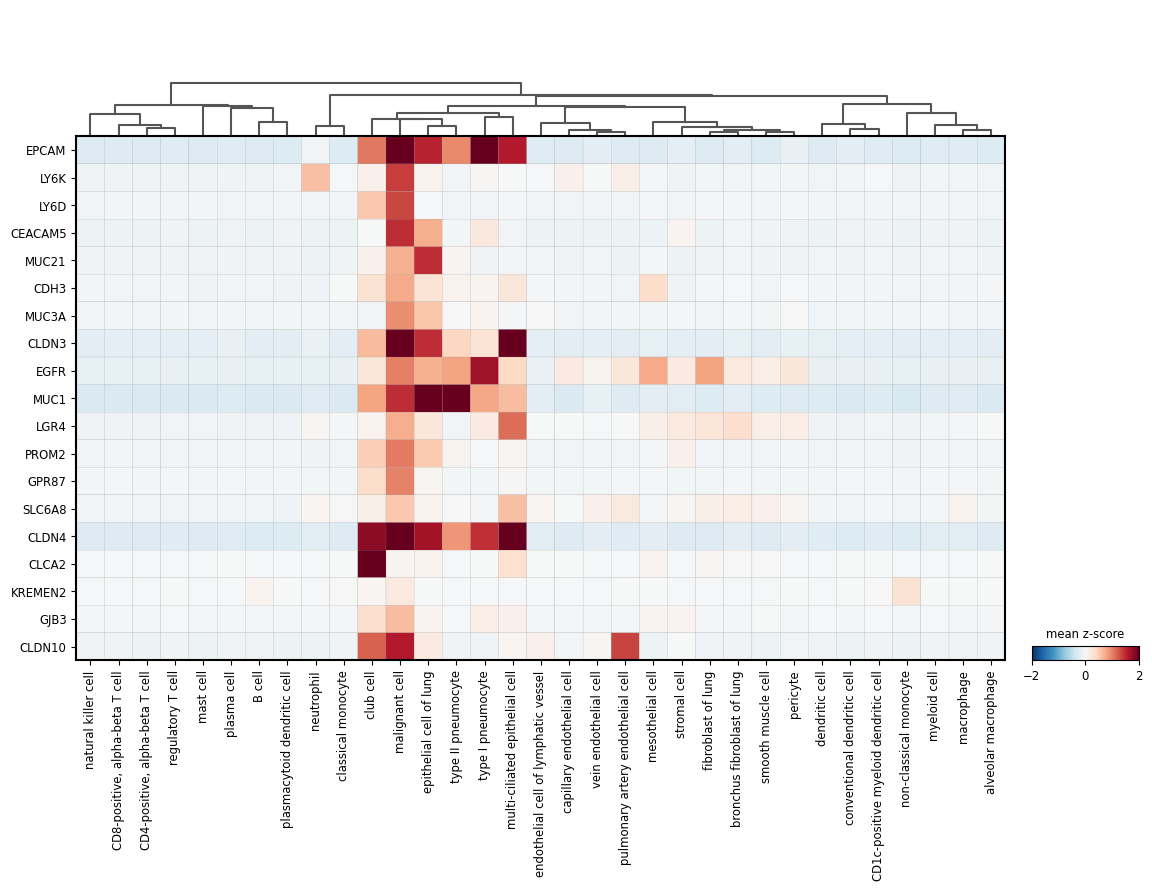

In [134]:
sc.pl.matrixplot(
    adata,
    descartes,
    "cell_type",
    dendrogram=True,
    swap_axes = True,
    colorbar_title="mean z-score",
    layer="scaled",
    vmin=-2,
    vmax=2,
    cmap="RdBu_r",
    gene_symbols = 'feature_name',
    save='luad.degs.heatmap.pdf'
)

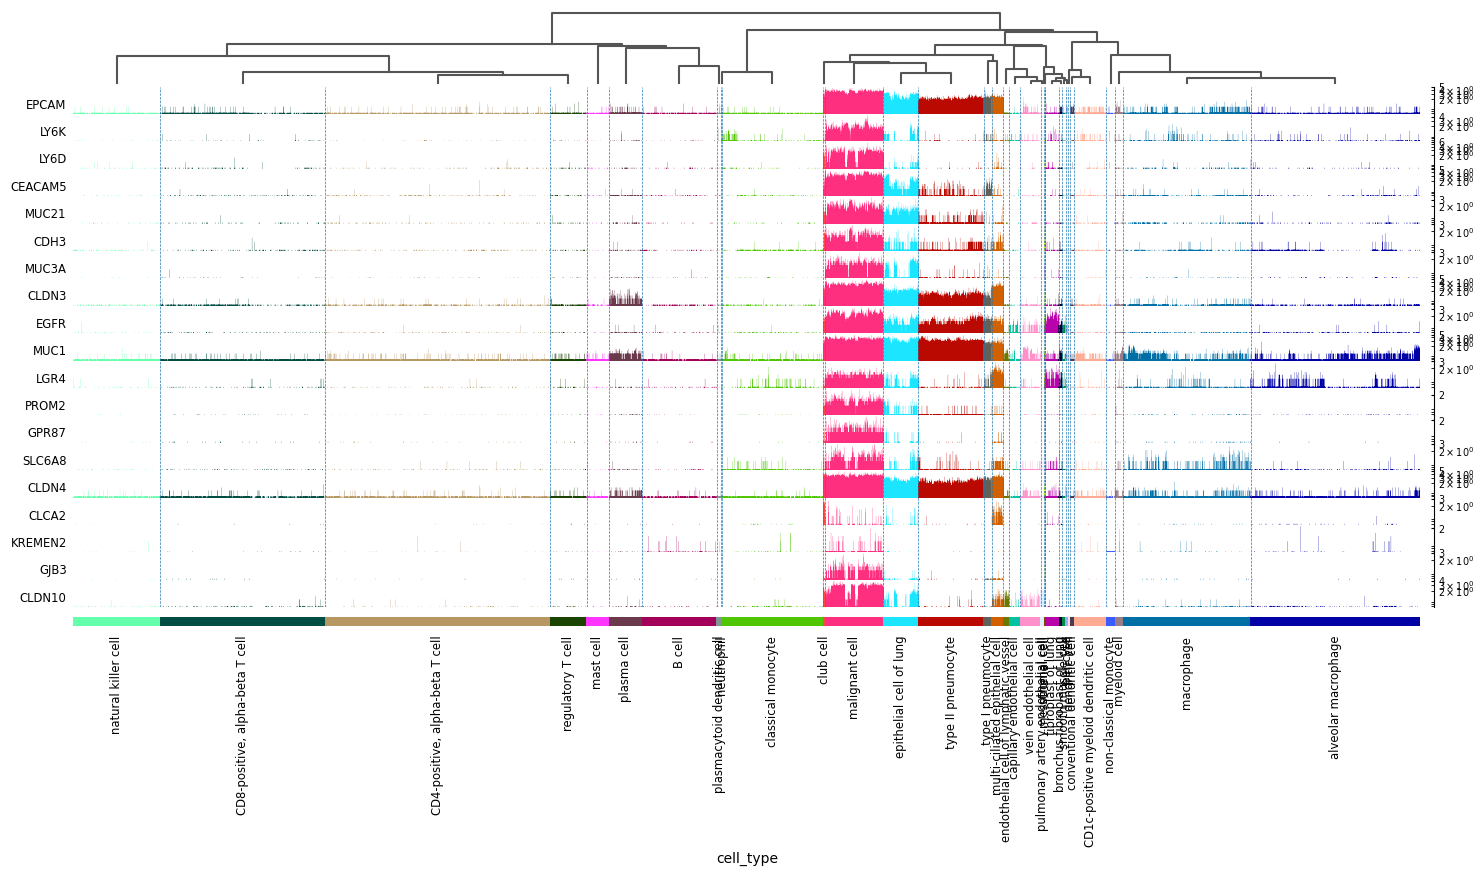

In [137]:
sc.pl.tracksplot(adata, 
                 descartes, 
                 "cell_type", 
                 dendrogram=True, 
                 log=True, figsize= (18,8),
                 gene_symbols = 'feature_name', 
                 save='luad.degs.tracksplot.pdf')

### Check the genes for Neuronal expression

In [148]:
#Human Brain Cell Atlas v1
hbca_data = sc.read_h5ad('/home/sharedFolder/int_fresh_start/descartes_ebru/Human_Brain_Cell_Atlas_v1.0_all_downloaded.06-22-2024.h5ad')
hbca_data

AnnData object with n_obs × n_vars = 2480956 × 59236
    obs: 'ROIGroup', 'ROIGroupCoarse', 'ROIGroupFine', 'roi', 'organism_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'assay_ontology_term_id', 'sex_ontology_term_id', 'development_stage_ontology_term_id', 'donor_id', 'suspension_type', 'dissection', 'fraction_mitochondrial', 'fraction_unspliced', 'cell_cycle_score', 'total_genes', 'total_UMIs', 'sample_id', 'supercluster_term', 'cluster_id', 'subcluster_id', 'cell_type_ontology_term_id', 'tissue_ontology_term_id', 'is_primary_data', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'Biotype', 'Chromosome', 'End', 'Gene', 'Start', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length'
    uns: 'batch_condition', 'citation', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_UMAP', 'X_tSNE

In [37]:
#hbca_data.var[hbca_data.var_names == "ENSG00000117525"]
#hbca_data.var

,Biotype,Chromosome,End,Gene,Start,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length
ENSG00000117525,n/a,chr1,94541759,F3,94529173,False,F3_ENSG00000117525,NCBITaxon:9606,gene,2886


In [1]:
#sc.pl.dotplot(hbca_data, marker_genes_dict_sym, "cell_type", dendrogram=True, gene_symbols = "Gene")
marker_genes_dict_sym_sub = surf_deg_luad['gene_name'].value_counts().head(40).index
sc.pl.tracksplot(hbca_data, marker_genes_dict_sym_sub, "cell_type", dendrogram=True, log=True, gene_symbols = 'Gene')

NameError: name 'surf_deg_luad' is not defined

In [15]:
hlca = sc.read_h5ad('/home/sharedFolder/int_fresh_start/descartes_ebru/The_integrated_Human_Lung_Cell_Atlas_downloaded.06-22-2024.h5ad')
hlca

AnnData object with n_obs × n_vars = 2282447 × 56239
    obs: 'suspension_type', 'donor_id', 'is_primary_data', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'tissue_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'cause_of_death', 'core_or_extension', 'dataset', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'smoking_status', 'study', 'subject_type', 'tissue_coarse_unharmonized', 

In [58]:
#hlca.var[hlca.var['original_gene_symbols'] == "MUC4"]#'CLDN7', 'MUC4' ---> missing genes in HLCA

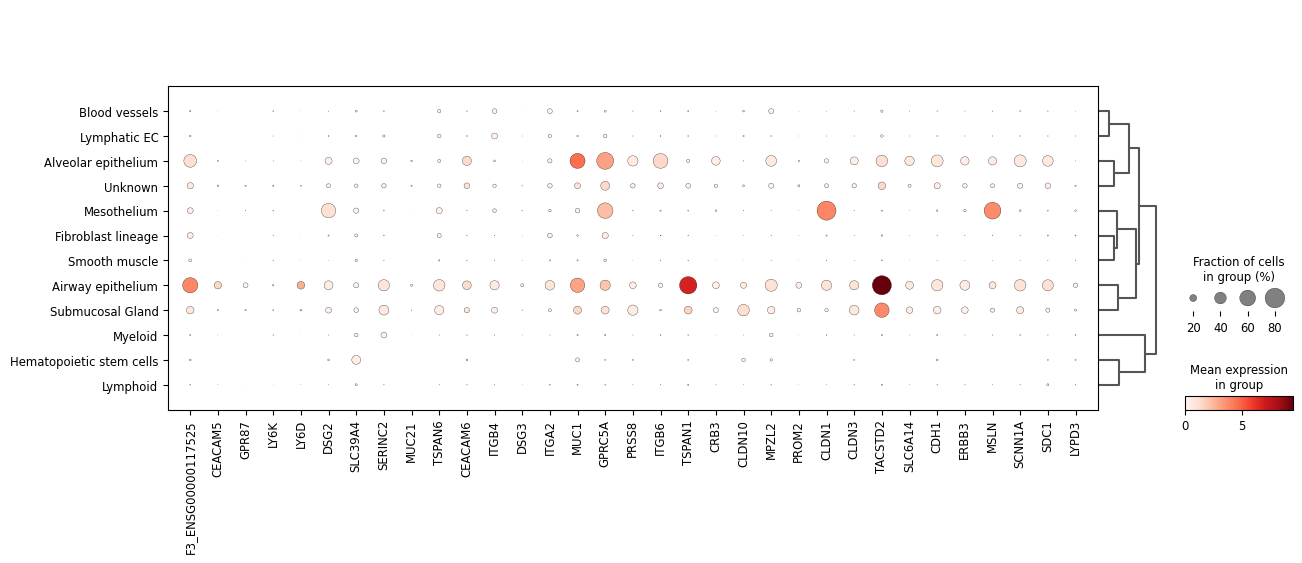

In [60]:
#hlca.obs['ann_level_2']
marker_genes_dict_sym_sub = ["F3_ENSG00000117525", "CEACAM5","GPR87","LY6K","LY6D","DSG2","SLC39A4","SERINC2","MUC21","TSPAN6","CEACAM6","ITGB4","DSG3","ITGA2","MUC1","GPRC5A","PRSS8","ITGB6","TSPAN1","CRB3","CLDN10","MPZL2","PROM2","CLDN1","CLDN3","TACSTD2","SLC6A14","CDH1","ERBB3","MSLN","SCNN1A","SDC1","LYPD3"]
sc.pl.dotplot(hlca, marker_genes_dict_sym_sub, "ann_level_2", dendrogram=True, gene_symbols = "feature_name")

In [10]:
#Tabula Sapiens:
tabu_data = sc.read_h5ad('/home/sharedFolder/int_fresh_start/descartes_ebru/TabulaSapiens_all_downloaded.06-21-2024.h5ad')
tabu_data

AnnData object with n_obs × n_vars = 483152 × 58482
    obs: 'tissue_in_publication', 'assay_ontology_term_id', 'donor_id', 'anatomical_information', 'n_counts_UMIs', 'n_genes', 'cell_ontology_class', 'free_annotation', 'manually_annotated', 'compartment', 'sex_ontology_term_id', 'disease_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'suspension_type', 'cell_type_ontology_term_id', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'feature_type', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length'
    uns: '_scvi', '_training_mode', 'citation', 'dendrogram_cell_type_tissue', 'dendrogram_computational_compartment_assignment', 'dendrogra

In [13]:
marker_genes_dict_sym_sub

Index(['SERINC2', 'LY6K', 'CEACAM5', 'DSG2', 'DCBLD2', 'MUC21', 'CDH3',
       'CLDN3', 'PROM2', 'TMEM184A', 'MUC3A', 'MUC1', 'SLC39A4', 'PODXL2',
       'ABCA7', 'LGR4', 'TSPAN6', 'ITGA2', 'MET', 'CEACAM6', 'CD24', 'ERBB3',
       'MPZL2', 'TSPAN1', 'EFNA4', 'EFNA5', 'LRIG3', 'ITGB8', 'CLDN10',
       'STEAP4', 'ITGB4', 'SLC34A2', 'TNFRSF21', 'EPCAM', 'EGFR', 'SEMA4B',
       'PRSS8', 'CRB3', 'GPRC5C', 'SEZ6L2'],
      dtype='object', name='gene_name')

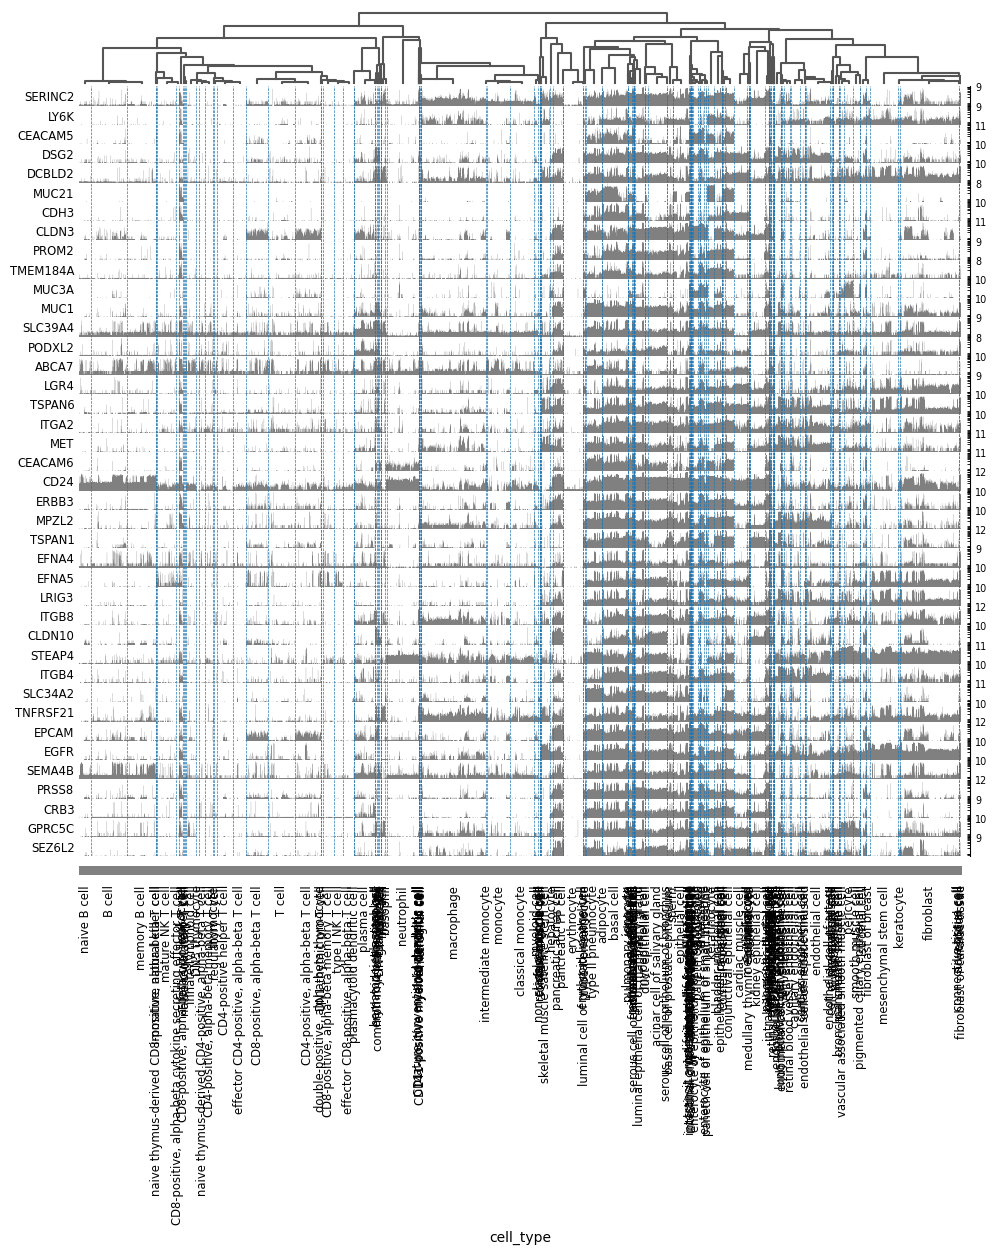

In [12]:
marker_genes_dict_sym_sub = surf_deg_luad['gene_name'].value_counts().head(40).index
sc.pl.tracksplot(tabu_data, marker_genes_dict_sym_sub, "cell_type", dendrogram=True, log=True, gene_symbols = 'feature_name')

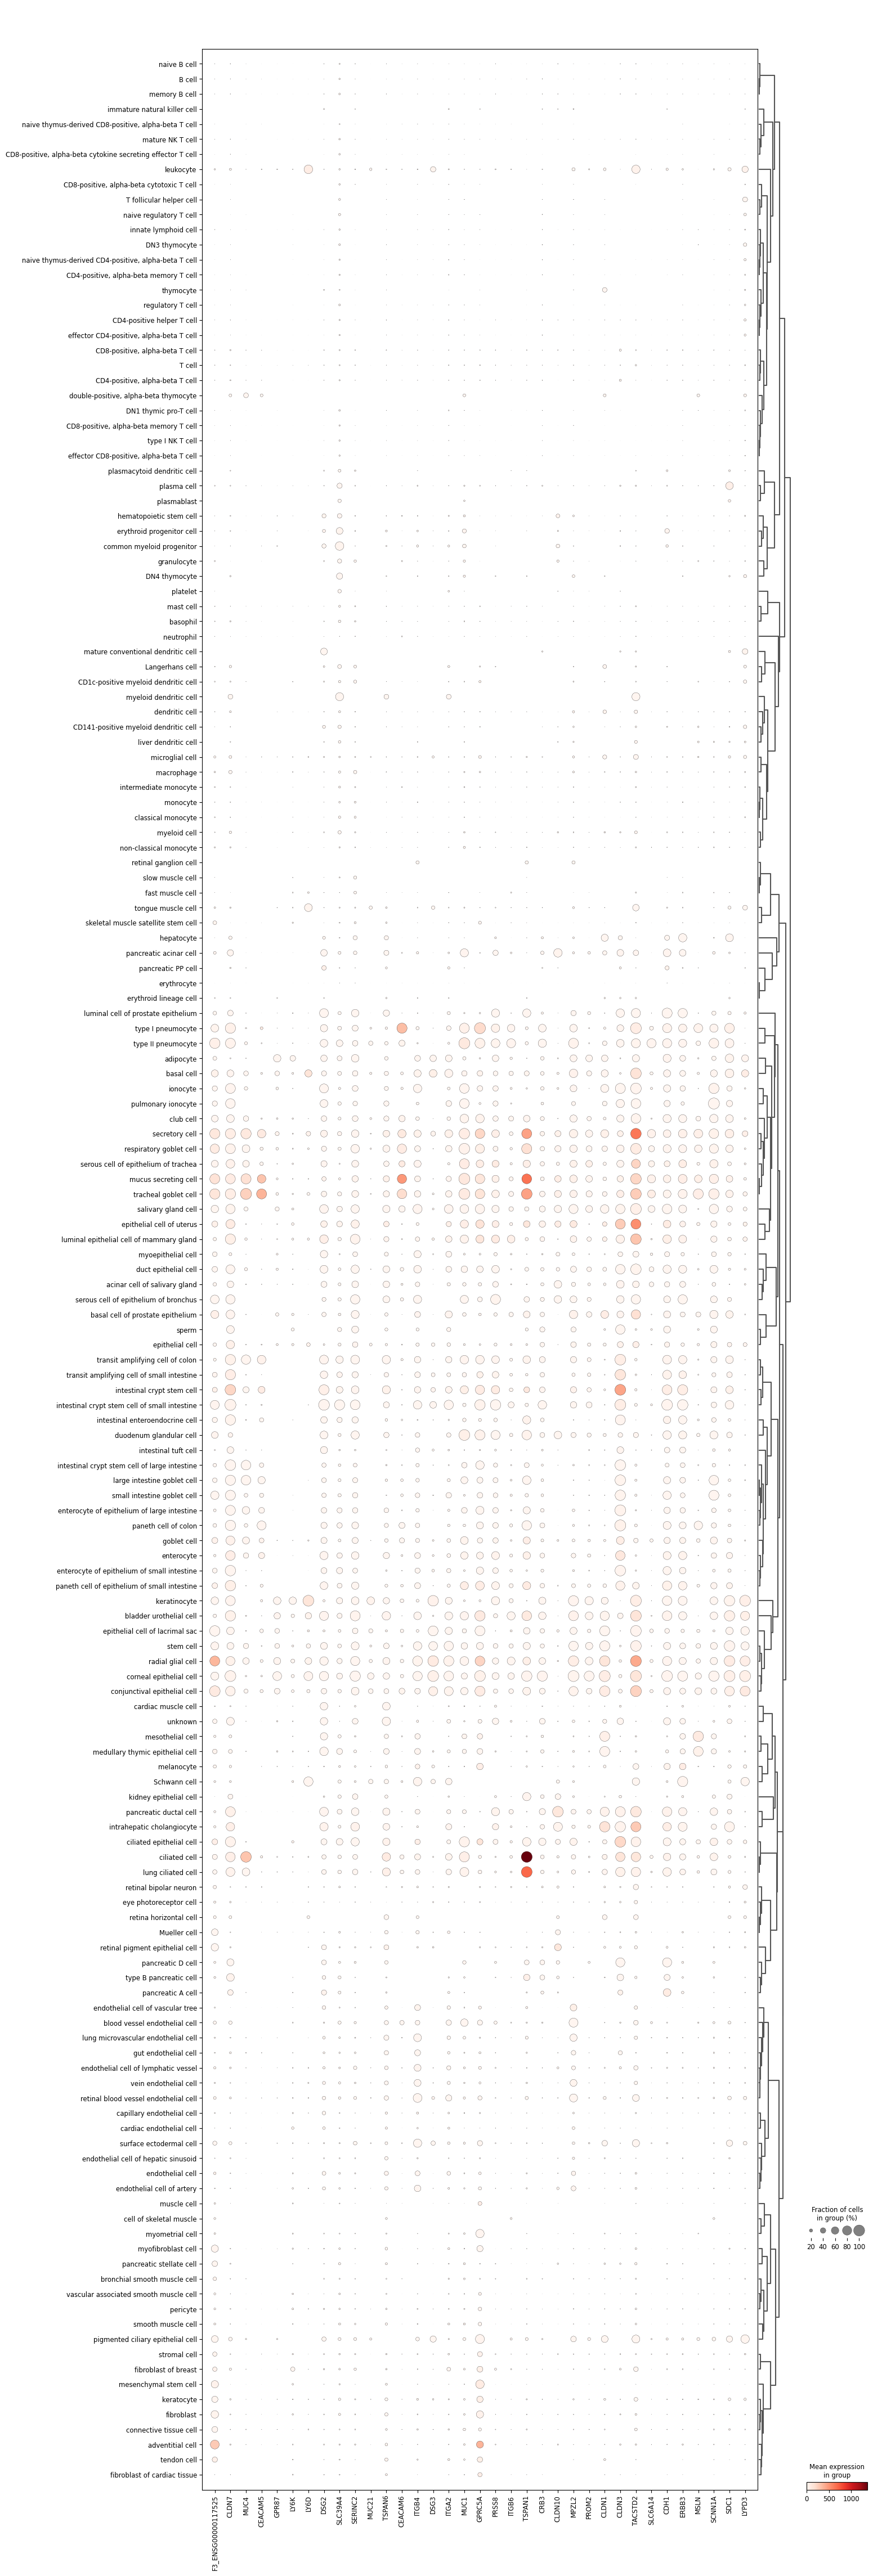

In [39]:
marker_genes_dict_sym_sub = []
marker_genes_dict_sym_sub = ["F3_ENSG00000117525", 'CLDN7', 'MUC4', "CEACAM5","GPR87","LY6K","LY6D","DSG2","SLC39A4","SERINC2","MUC21","TSPAN6","CEACAM6","ITGB4","DSG3","ITGA2","MUC1","GPRC5A","PRSS8","ITGB6","TSPAN1","CRB3","CLDN10","MPZL2","PROM2","CLDN1","CLDN3","TACSTD2","SLC6A14","CDH1","ERBB3","MSLN","SCNN1A","SDC1","LYPD3"]
sc.pl.dotplot(tabu_data, marker_genes_dict_sym_sub, "cell_type", dendrogram=True, gene_symbols = "feature_name")

In [19]:
hbca_data.obs.columns

Index(['ROIGroup', 'ROIGroupCoarse', 'ROIGroupFine', 'roi',
       'organism_ontology_term_id', 'disease_ontology_term_id',
       'self_reported_ethnicity_ontology_term_id', 'assay_ontology_term_id',
       'sex_ontology_term_id', 'development_stage_ontology_term_id',
       'donor_id', 'suspension_type', 'dissection', 'fraction_mitochondrial',
       'fraction_unspliced', 'cell_cycle_score', 'total_genes', 'total_UMIs',
       'sample_id', 'supercluster_term', 'cluster_id', 'subcluster_id',
       'cell_type_ontology_term_id', 'tissue_ontology_term_id',
       'is_primary_data', 'tissue_type', 'cell_type', 'assay', 'disease',
       'organism', 'sex', 'tissue', 'self_reported_ethnicity',
       'development_stage', 'observation_joinid'],
      dtype='object')

In [24]:
hbca_data.obs['tissue'].unique()

['myelencephalon', 'pons', 'cerebellum', 'midbrain', 'thalamic complex', 'hypothalamus', 'spinal cord', 'cerebral nuclei', 'hippocampal formation', 'cerebral cortex']
Categories (10, object): ['cerebral cortex', 'pons', 'midbrain', 'hypothalamus', ..., 'hippocampal formation', 'myelencephalon', 'thalamic complex', 'cerebral nuclei']

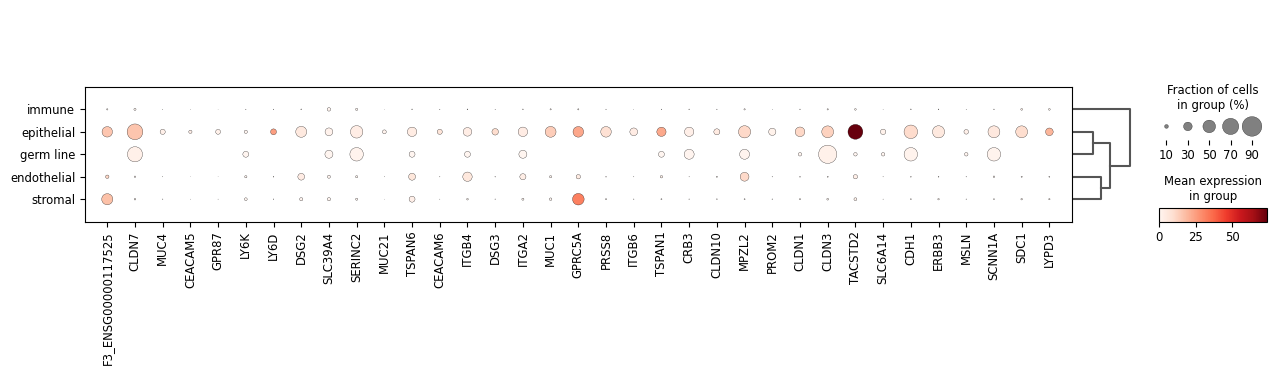

In [40]:
marker_genes_dict_sym_sub = ["F3_ENSG00000117525", 'CLDN7', 'MUC4', "CEACAM5","GPR87","LY6K","LY6D","DSG2","SLC39A4","SERINC2","MUC21","TSPAN6","CEACAM6","ITGB4","DSG3","ITGA2","MUC1","GPRC5A","PRSS8","ITGB6","TSPAN1","CRB3","CLDN10","MPZL2","PROM2","CLDN1","CLDN3","TACSTD2","SLC6A14","CDH1","ERBB3","MSLN","SCNN1A","SDC1","LYPD3"]
sc.pl.dotplot(tabu_data, marker_genes_dict_sym_sub, "compartment", dendrogram=True, gene_symbols = "feature_name")

240623 Plot trials by ebru

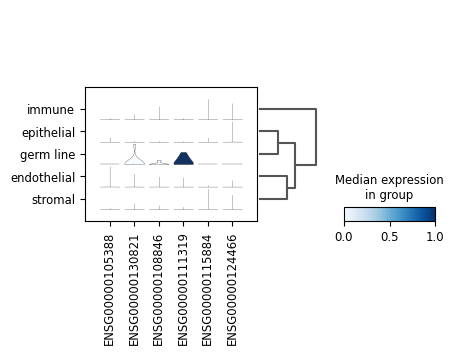

In [56]:
marker_genes_dict = ["ENSG00000105388","ENSG00000130821","ENSG00000108846","ENSG00000111319","ENSG00000115884","ENSG00000124466"]
#import scanpy as sc
#from matplotlib.pyplot import rc_context
with rc_context({"figure.figsize": (4.5, 3)}):
    sc.pl.stacked_violin(tabu_data, marker_genes_dict, groupby="compartment", dendrogram=True)

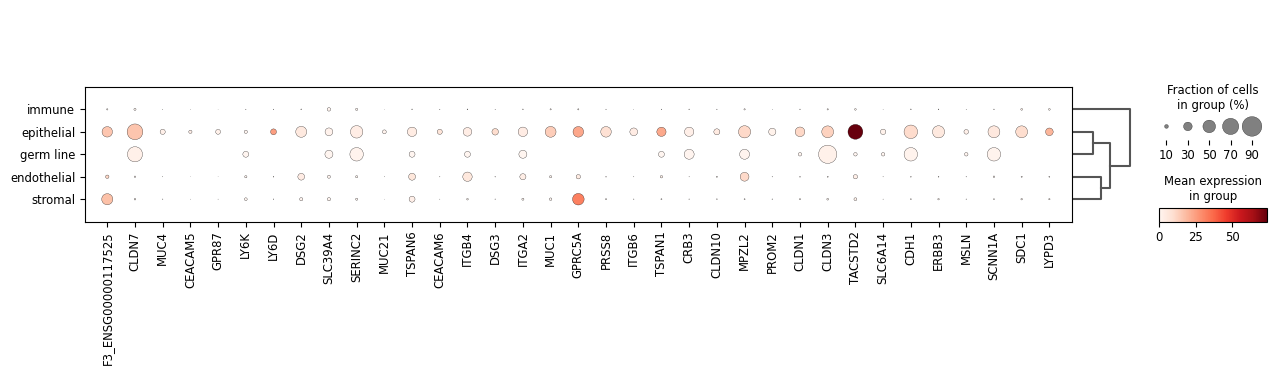

In [47]:
marker_genes_dict_sym_sub = ["F3_ENSG00000117525", 'CLDN7', 'MUC4', "CEACAM5","GPR87","LY6K","LY6D","DSG2","SLC39A4","SERINC2","MUC21","TSPAN6","CEACAM6","ITGB4","DSG3","ITGA2","MUC1","GPRC5A","PRSS8","ITGB6","TSPAN1","CRB3","CLDN10","MPZL2","PROM2","CLDN1","CLDN3","TACSTD2","SLC6A14","CDH1","ERBB3","MSLN","SCNN1A","SDC1","LYPD3"]
sc.pl.dotplot(tabu_data, marker_genes_dict_sym_sub, "compartment", dendrogram=True, gene_symbols = "feature_name")

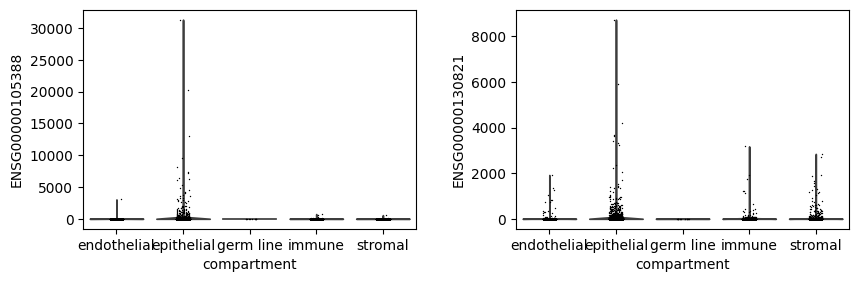

In [55]:
with rc_context({"figure.figsize": (4.5, 3)}):
    sc.pl.violin(tabu_data, ["ENSG00000105388","ENSG00000130821"], groupby="compartment")

In [ ]:
### To do for Meeting on July 12th
### scaling problem of different circle plots. 
### saving adata of pb matrix 
### Create a distribution heatmap for pb profiles of genes. fraction of samples rather than fraction of cells.



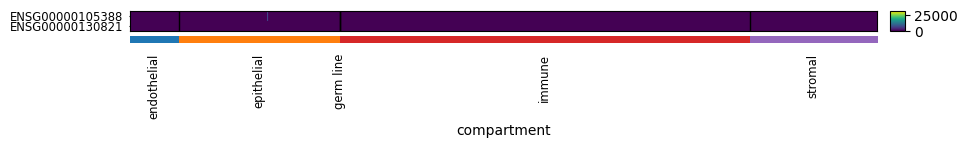

In [55]:
marker_genes_dict_sym_sub = ["F3_ENSG00000117525", 'CLDN7', 'MUC4', "CEACAM5","GPR87","LY6K","LY6D","DSG2","SLC39A4","SERINC2","MUC21","TSPAN6","CEACAM6","ITGB4","DSG3","ITGA2","MUC1","GPRC5A","PRSS8","ITGB6","TSPAN1","CRB3","CLDN10","MPZL2","PROM2","CLDN1","CLDN3","TACSTD2","SLC6A14","CDH1","ERBB3","MSLN","SCNN1A","SDC1","LYPD3"]
sc.pl.heatmap(tabu_data, marker_genes_dict_sym_sub,  "compartment",swap_axes=True)